In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
plt.style.use('ggplot')

In [2]:
# Define column names
column_names = ['Marital status','Application mode','Application order','Course','Daytime/evening attendance','Previous qualification','Nationality',"Mother's qualification","Father's qualification","Mother's occupation","Father's occupation","Displaced","Educational special needs",'Debtor','Tuition fees up to date','Gender','Scholarship holder','Age at enrollment','International','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)','Unemployment rate','Inflation rate','GDP','Target']

try:
  # Load the dataset
  df = pd.read_csv('dataset.csv', header=35, names=column_names)
  print("Successfully read the CSV file.")
except FileNotFoundError:
  print(f"Error: File not found at {'dataset.csv'}. Please check the path.")
except pd.errors.ParserError:
  print(f"Error: Could not parse the CSV file at {'dataset.csv'}. Please check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Successfully read the CSV file.


In [3]:
type(df)


pandas.core.frame.DataFrame

In [4]:
print(df.keys())

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [5]:
df.head()

Marital status  Application mode  Application order  Course  \
0               1                12                  1       1   
1               1                12                  1       7   
2               1                14                  1       9   
3               4                12                  1      17   
4               1                15                  1       8   

   Daytime/evening attendance  Previous qualification  Nationality  \
0                           1                       1            1   
1                           1                       8            1   
2                           1                       1            1   
3                           0                       1            1   
4                           1                      14            3   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      23                      27                   10  ...   
1                      19                      27                    1  ...   
2                      22                      27                    7  ...   
3                      13                      14                   10  ...   
4                       4                       4                    4  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    7   
1                                    0                                    5   
2                                    0                                    5   
3                                    0                                    5   
4                                    1                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       7   
1                                       0   
2                                       8   
3                                       5   
4                                      11   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    1                              10.0   
1                                    0                               0.0   
2                                    2                              12.0   
3                                    5                              11.6   
4                                    3                              12.0   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0                8.9   
1                                               0                7.6   
2                                               2               16.2   
3                                               0                7.6   
4                                               0               12.4   

   Inflation rate   GDP    Target  
0             1.4  3.51   Dropout  
1             2.6  0.32   Dropout  
2             0.3 -0.92   Dropout  
3             2.6  0.32  Graduate  
4             0.5  1.79   Dropout  

[5 rows x 35 columns]

In [6]:
df.shape

(4389, 35)

In [7]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Marital status: 6 distinct values
Application mode: 18 distinct values
Application order: 8 distinct values
Course: 17 distinct values
Daytime/evening attendance: 2 distinct values
Previous qualification: 17 distinct values
Nationality: 21 distinct values
Mother's qualification: 29 distinct values
Father's qualification: 34 distinct values
Mother's occupation: 31 distinct values
Father's occupation: 45 distinct values
Displaced: 2 distinct values
Educational special needs: 2 distinct values
Debtor: 2 distinct values
Tuition fees up to date: 2 distinct values
Gender: 2 distinct values
Scholarship holder: 2 distinct values
Age at enrollment: 46 distinct values
International: 2 distinct values
Curricular units 1st sem (credited): 21 distinct values
Curricular units 1st sem (enrolled): 23 distinct values
Curricular units 1st sem (evaluations): 35 distinct values
Curricular units 1st sem (approved): 23 distinct values
Curricular units 1st sem (grade): 800 distinct values
Curricular units 1s

###################################   Data Preprocessing    ###################################

In [8]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [9]:
# Find unique names for column 'Target'
target_names = df['Target'].unique()
print(target_names)

['Dropout' 'Graduate' 'Enrolled']


In [10]:
# Convert 'Target' to binary ('Dropout'=2, 'Graduate'=1, 'Enrolled'=0)
df['Target'] = df['Target'].map({'Dropout': 2, 'Graduate': 1, 'Enrolled': 0})


In [11]:
# Check the current max columns setting
print(pd.get_option('display.max_columns'))


20


In [12]:
# Set to display all columns (None means no limit)
pd.set_option('display.max_columns', 35)


# Describe the DataFrame for all columns
df.describe(include='all')



Marital status  Application mode  Application order       Course  \
count     4389.000000       4389.000000        4389.000000  4389.000000   
mean         1.179540          6.902256           1.727045     9.897471   
std          0.607707          5.298111           1.314060     4.332254   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nationality  \
count                 4389.000000             4389.000000  4389.000000   
mean                     0.890864                2.534746     1.253361   
std                      0.311846                3.965782     1.742954   
min                      0.000000                1.000000     1.000000   
25%                      1.000000                1.000000     1.000000   
50%                      1.000000                1.000000     1.000000   
75%                      1.000000                1.000000     1.000000   
max                      1.000000               17.000000    21.000000   

       Mother's qualification  Father's qualification  Mother's occupation  \
count              4389.00000             4389.000000          4389.000000   
mean                 12.32946               16.456824             7.320346   
std                   9.03303               11.043597             4.004771   
min                   1.00000                1.000000             1.000000   
25%                   2.00000                3.000000             5.000000   
50%                  13.00000               14.000000             6.000000   
75%                  22.00000               27.000000            10.000000   
max                  29.00000               34.000000            32.000000   

       Father's occupation    Displaced  Educational special needs  \
count          4389.000000  4389.000000                 4389.00000   
mean              7.816359     0.546594                    0.01162   
std               4.866494     0.497881                    0.10718   
min               1.000000     0.000000                    0.00000   
25%               5.000000     0.000000                    0.00000   
50%               8.000000     1.000000                    0.00000   
75%              10.000000     1.000000                    0.00000   
max              46.000000     1.000000                    1.00000   

            Debtor  Tuition fees up to date       Gender  Scholarship holder  \
count  4389.000000              4389.000000  4389.000000         4389.000000   
mean      0.113921                 0.880838     0.352244            0.248576   
std       0.317752                 0.324015     0.477724            0.432237   
min       0.000000                 0.000000     0.000000            0.000000   
25%       0.000000                 1.000000     0.000000            0.000000   
50%       0.000000                 1.000000     0.000000            0.000000   
75%       0.000000                 1.000000     1.000000            0.000000   
max       1.000000                 1.000000     1.000000            1.000000   

       Age at enrollment  International  Curricular units 1st sem (credited)  \
count        4389.000000    4389.000000                          4389.000000   
mean           23.280930       0.024835                             0.715197   
std             7.590064       0.155639                             2.368992   
min            17.000000       0.000000                             0.000000   
25%            19.000000       0.000000                             0.000000   
50%            20.000000       0.000000                             0.000000   
75%            25.000000       0.000000          

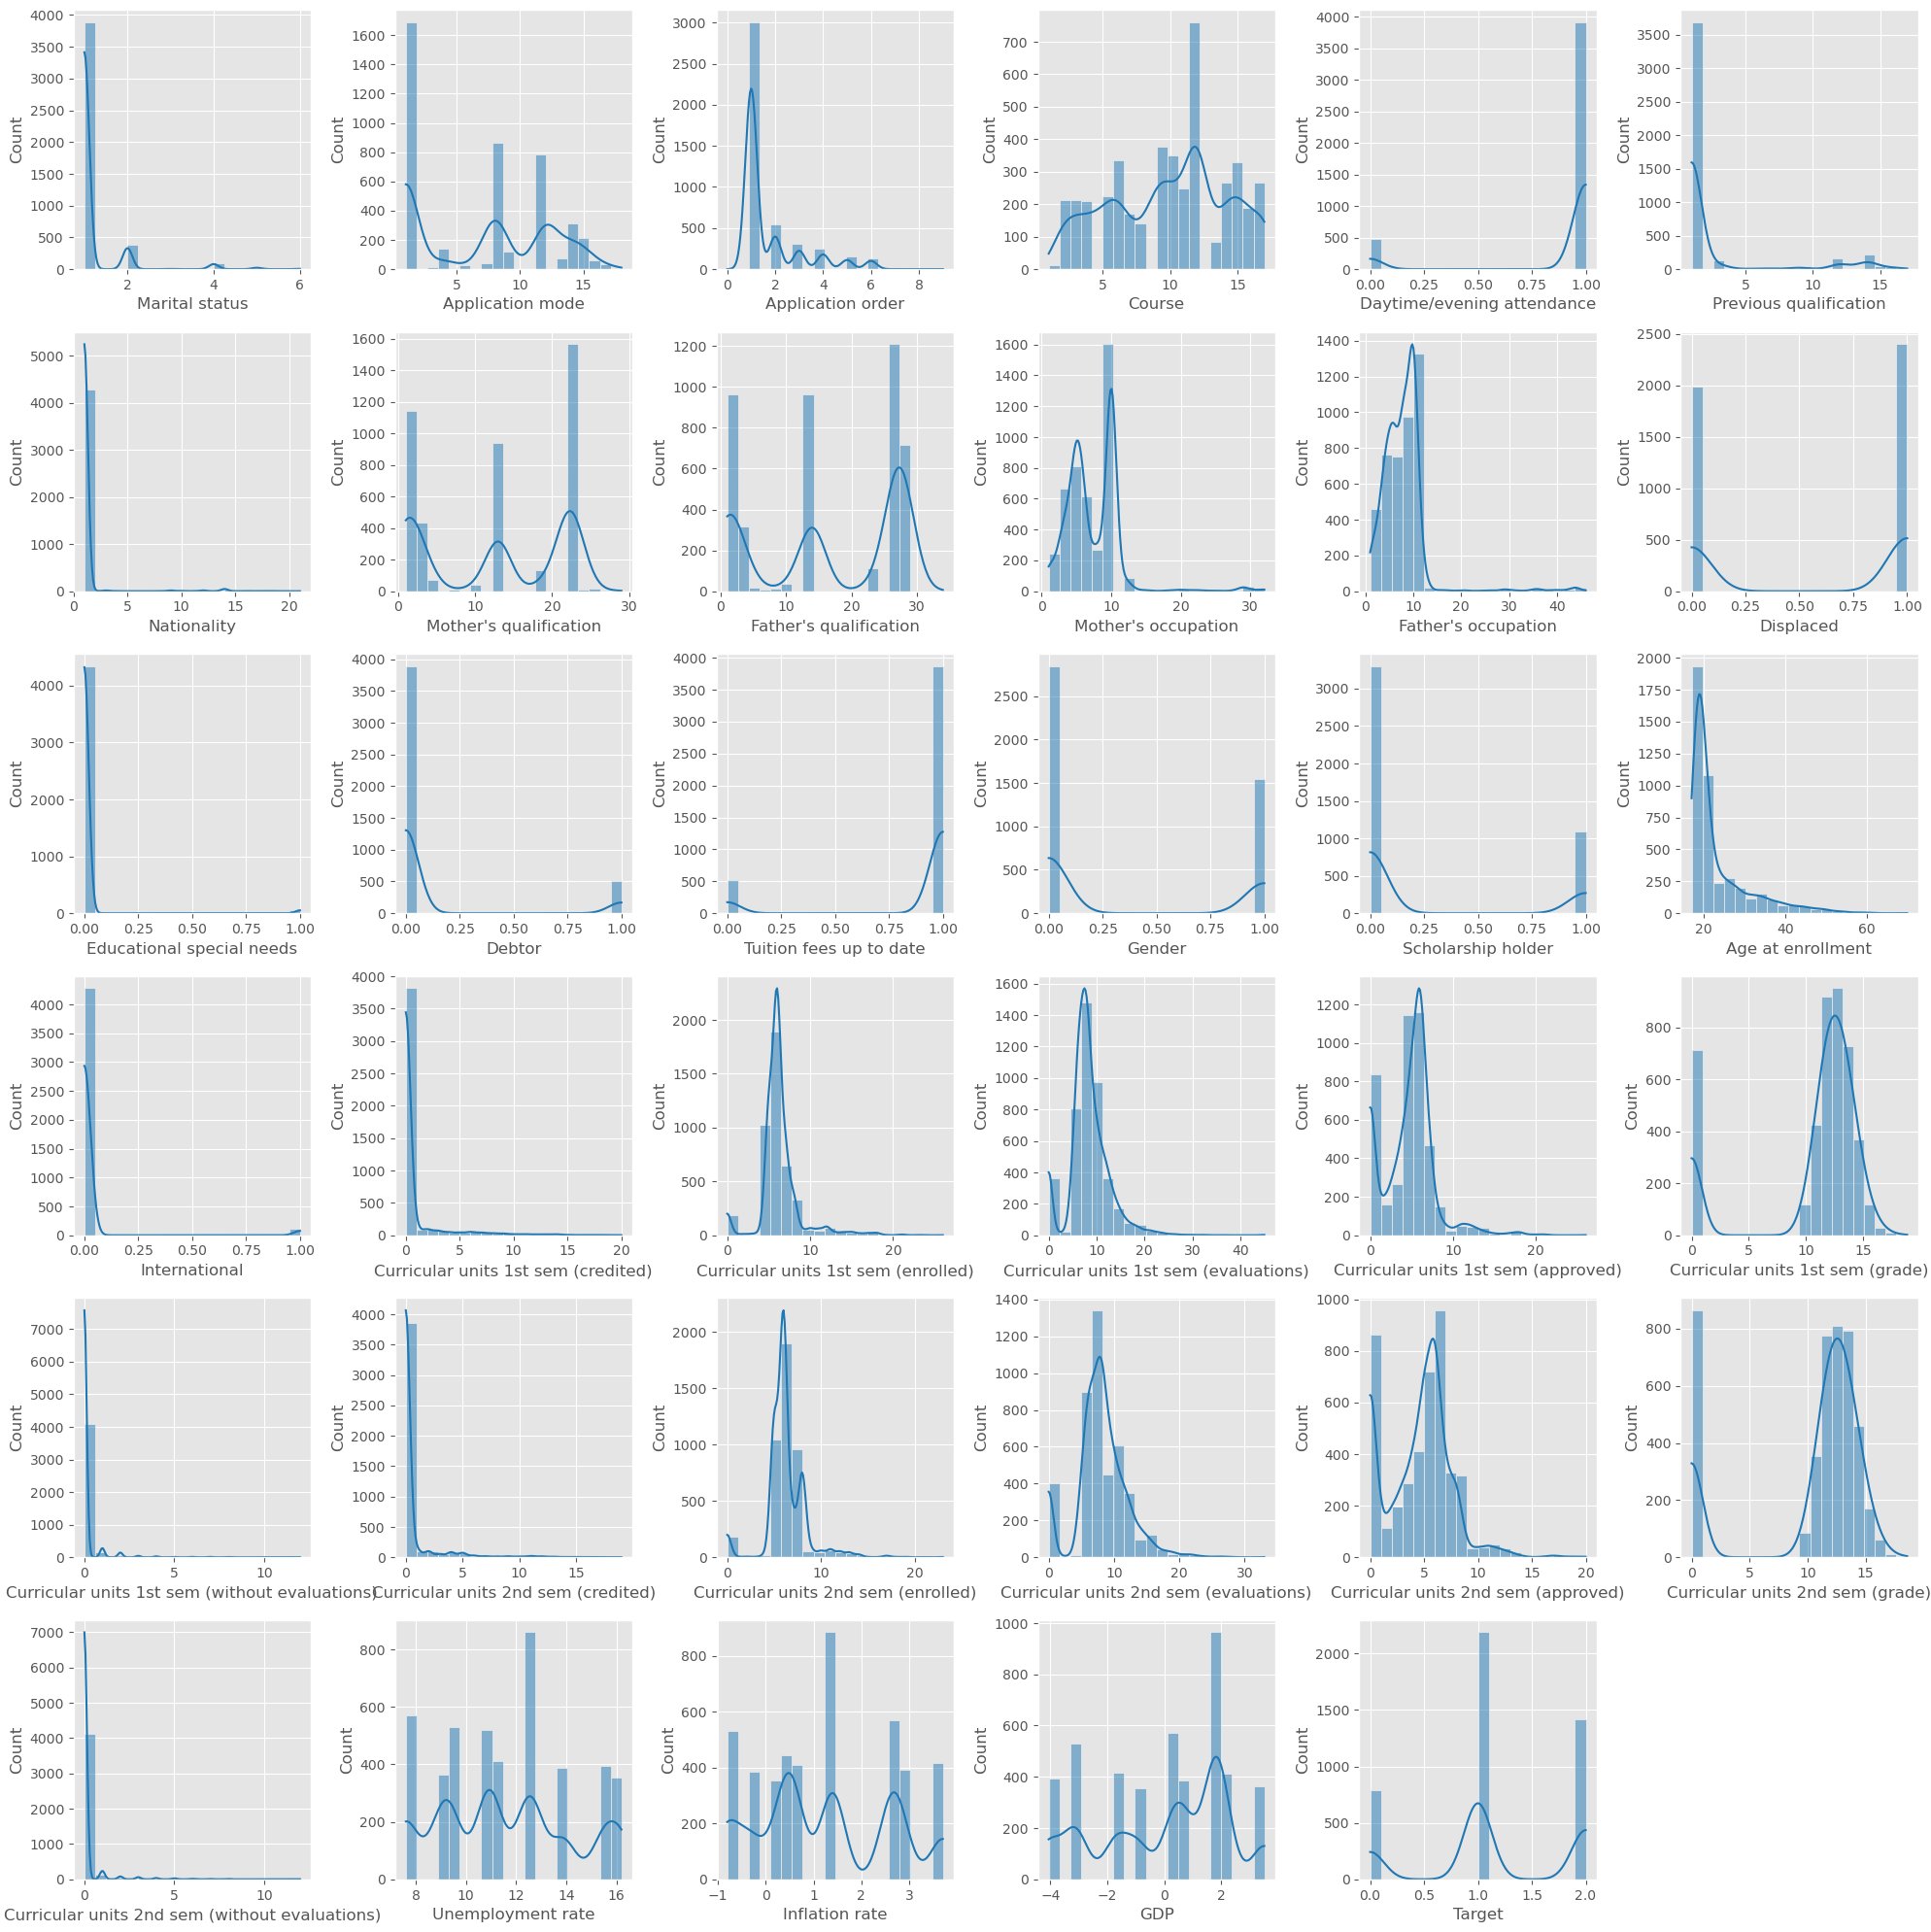

In [13]:
num_columns = len(df.columns)
num_rows = (num_columns // 6) + (1 if num_columns % 6 != 0 else 0)

plt.figure(figsize=(20, 20))
sns.set_palette("tab10")


for i, column in enumerate(df.columns, 1):
    plt.subplot(num_rows, 6, i)
    sns.histplot(data=df, x=column, kde=True, bins=20)  

plt.tight_layout()

plt.show()

###################################   EDA     ###################################

In [14]:
# Drop low-variance features
low_variance_features = [column for column in df.columns if df[column].var() < 0.1]

# Combine both lists to drop columns
to_drop = list(set( low_variance_features))
df = df.drop(columns=to_drop)

print("Dropped columns due to low variance:", to_drop)

Dropped columns due to low variance: ['Educational special needs', 'Daytime/evening attendance', 'International']


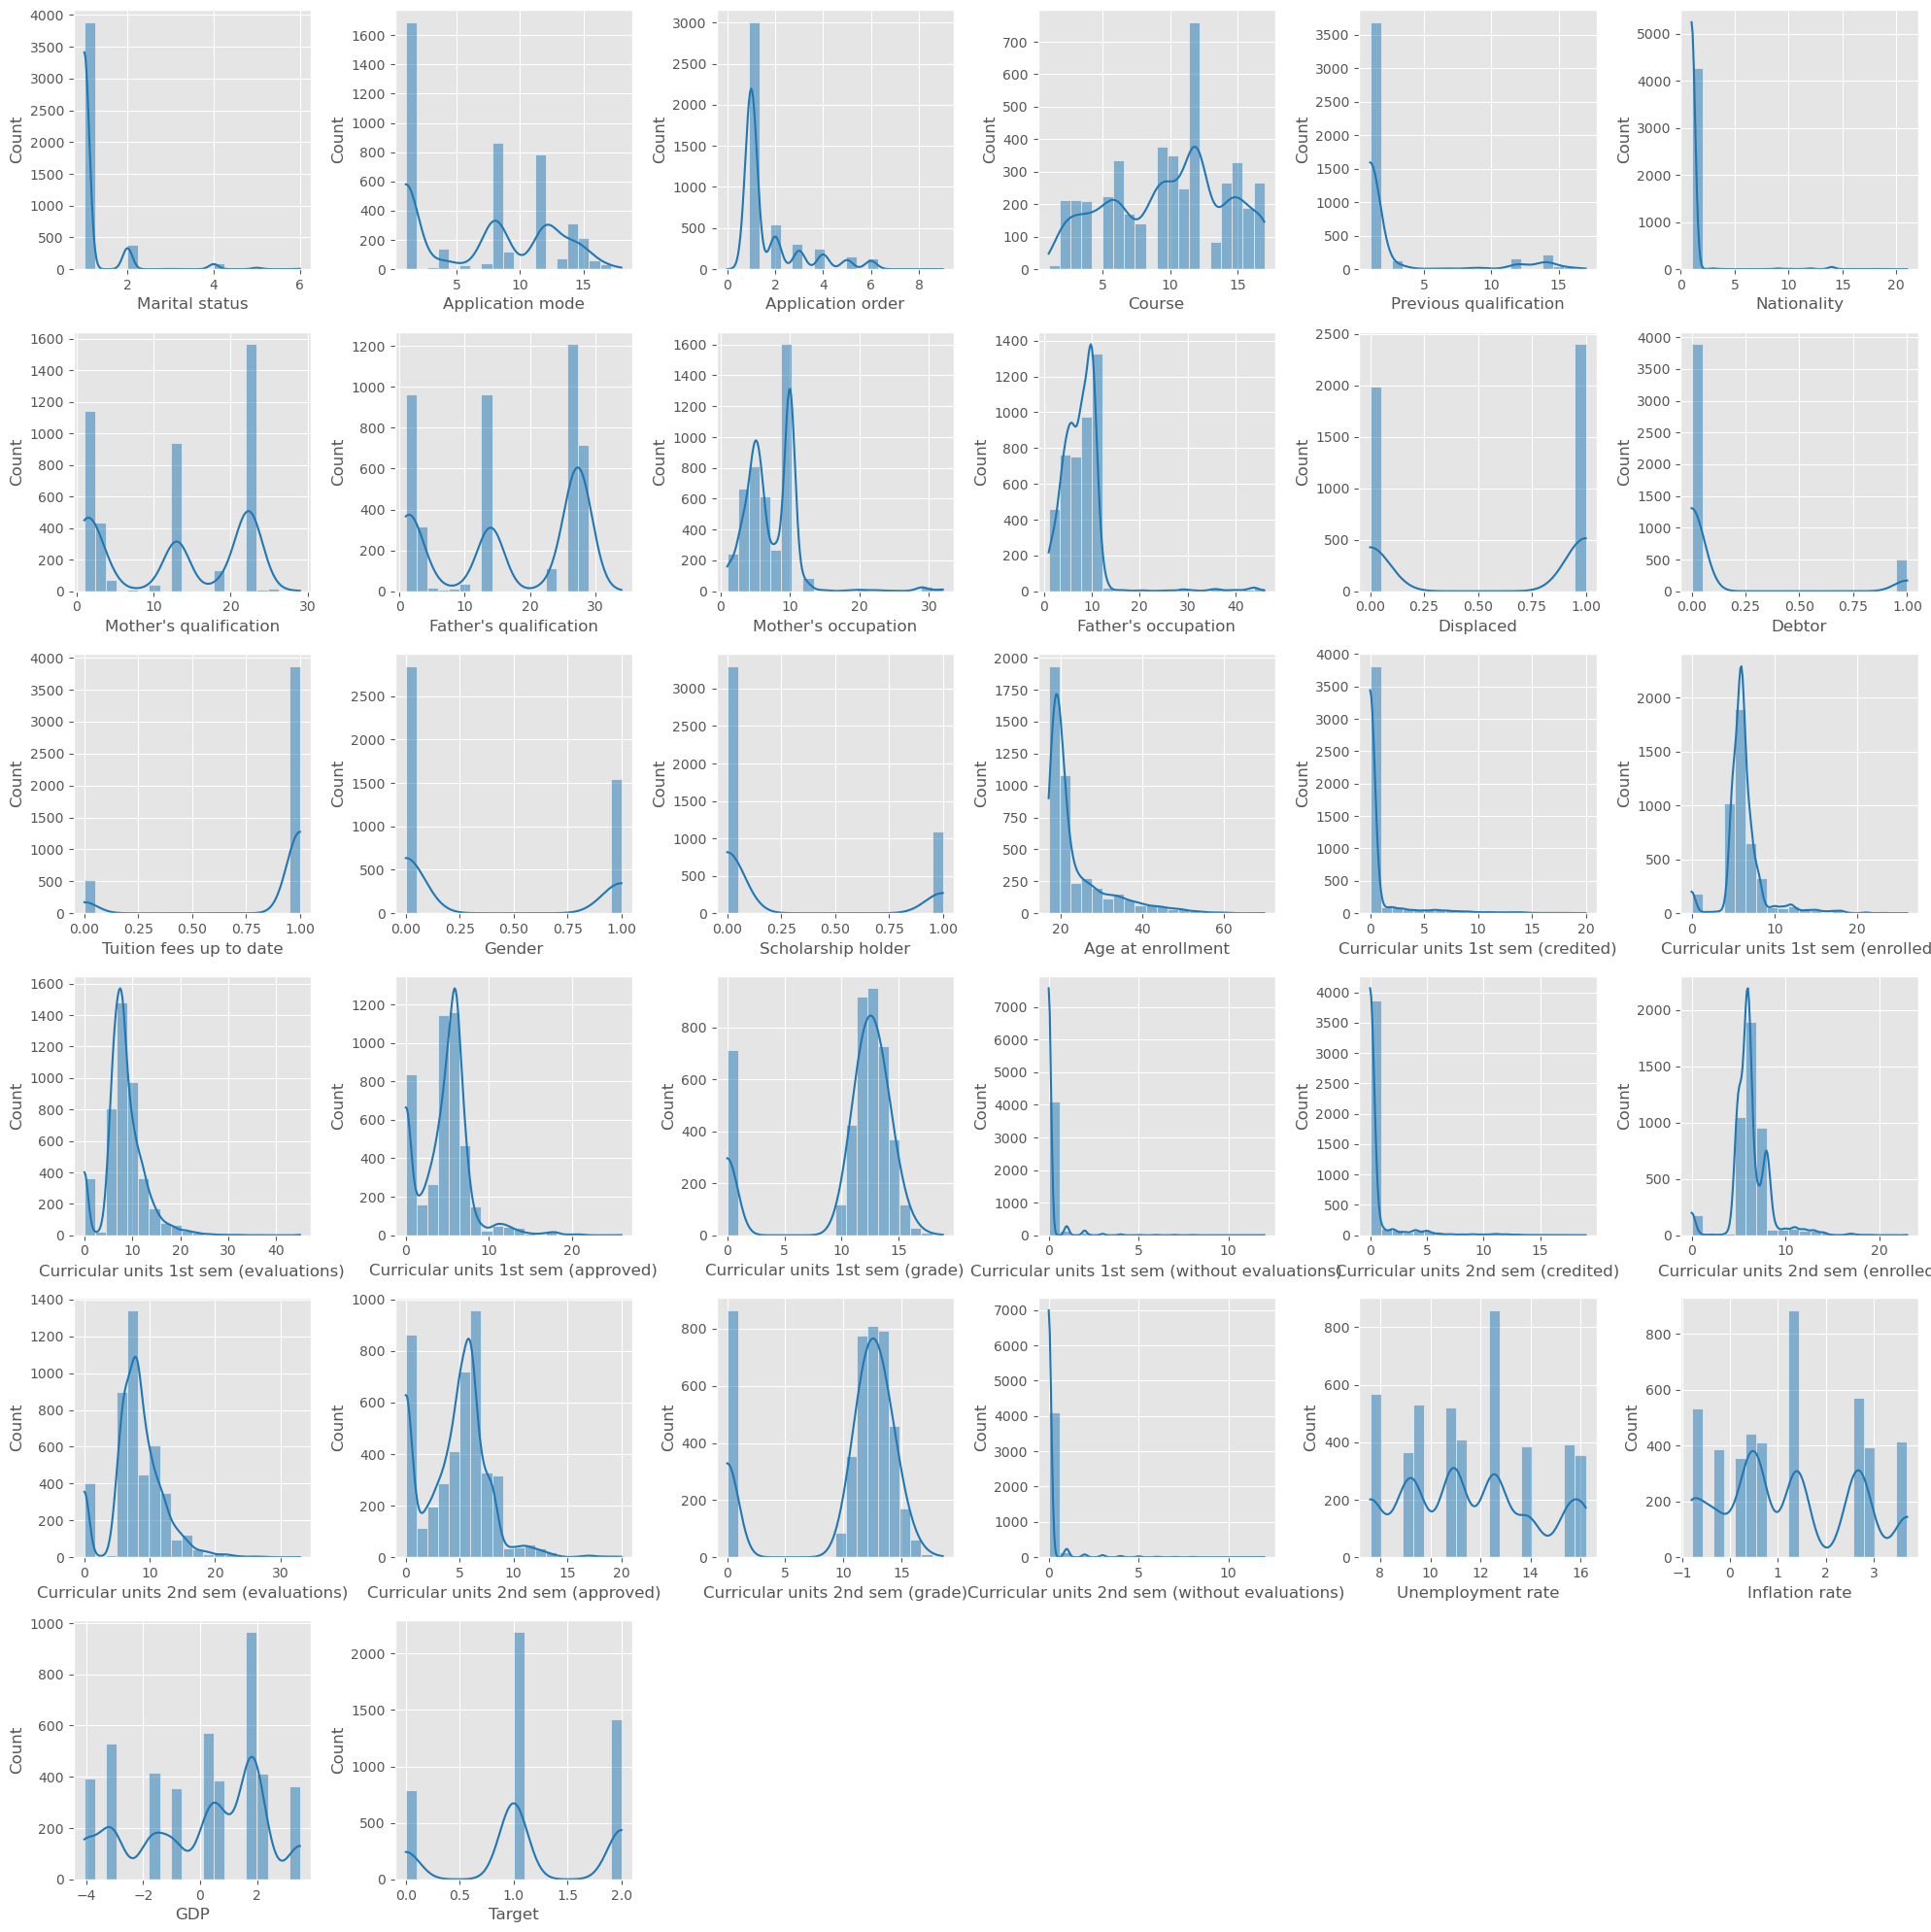

In [15]:
num_columns = len(df.columns)
num_rows = (num_columns // 6) + (1 if num_columns % 6 != 0 else 0)

plt.figure(figsize=(20, 20))
sns.set_palette("tab10")


for i, column in enumerate(df.columns, 1):
    plt.subplot(num_rows, 6, i)
    sns.histplot(data=df, x=column, kde=True, bins=20)  

plt.tight_layout()

plt.show()

Features removed due to high correlation: ['Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']


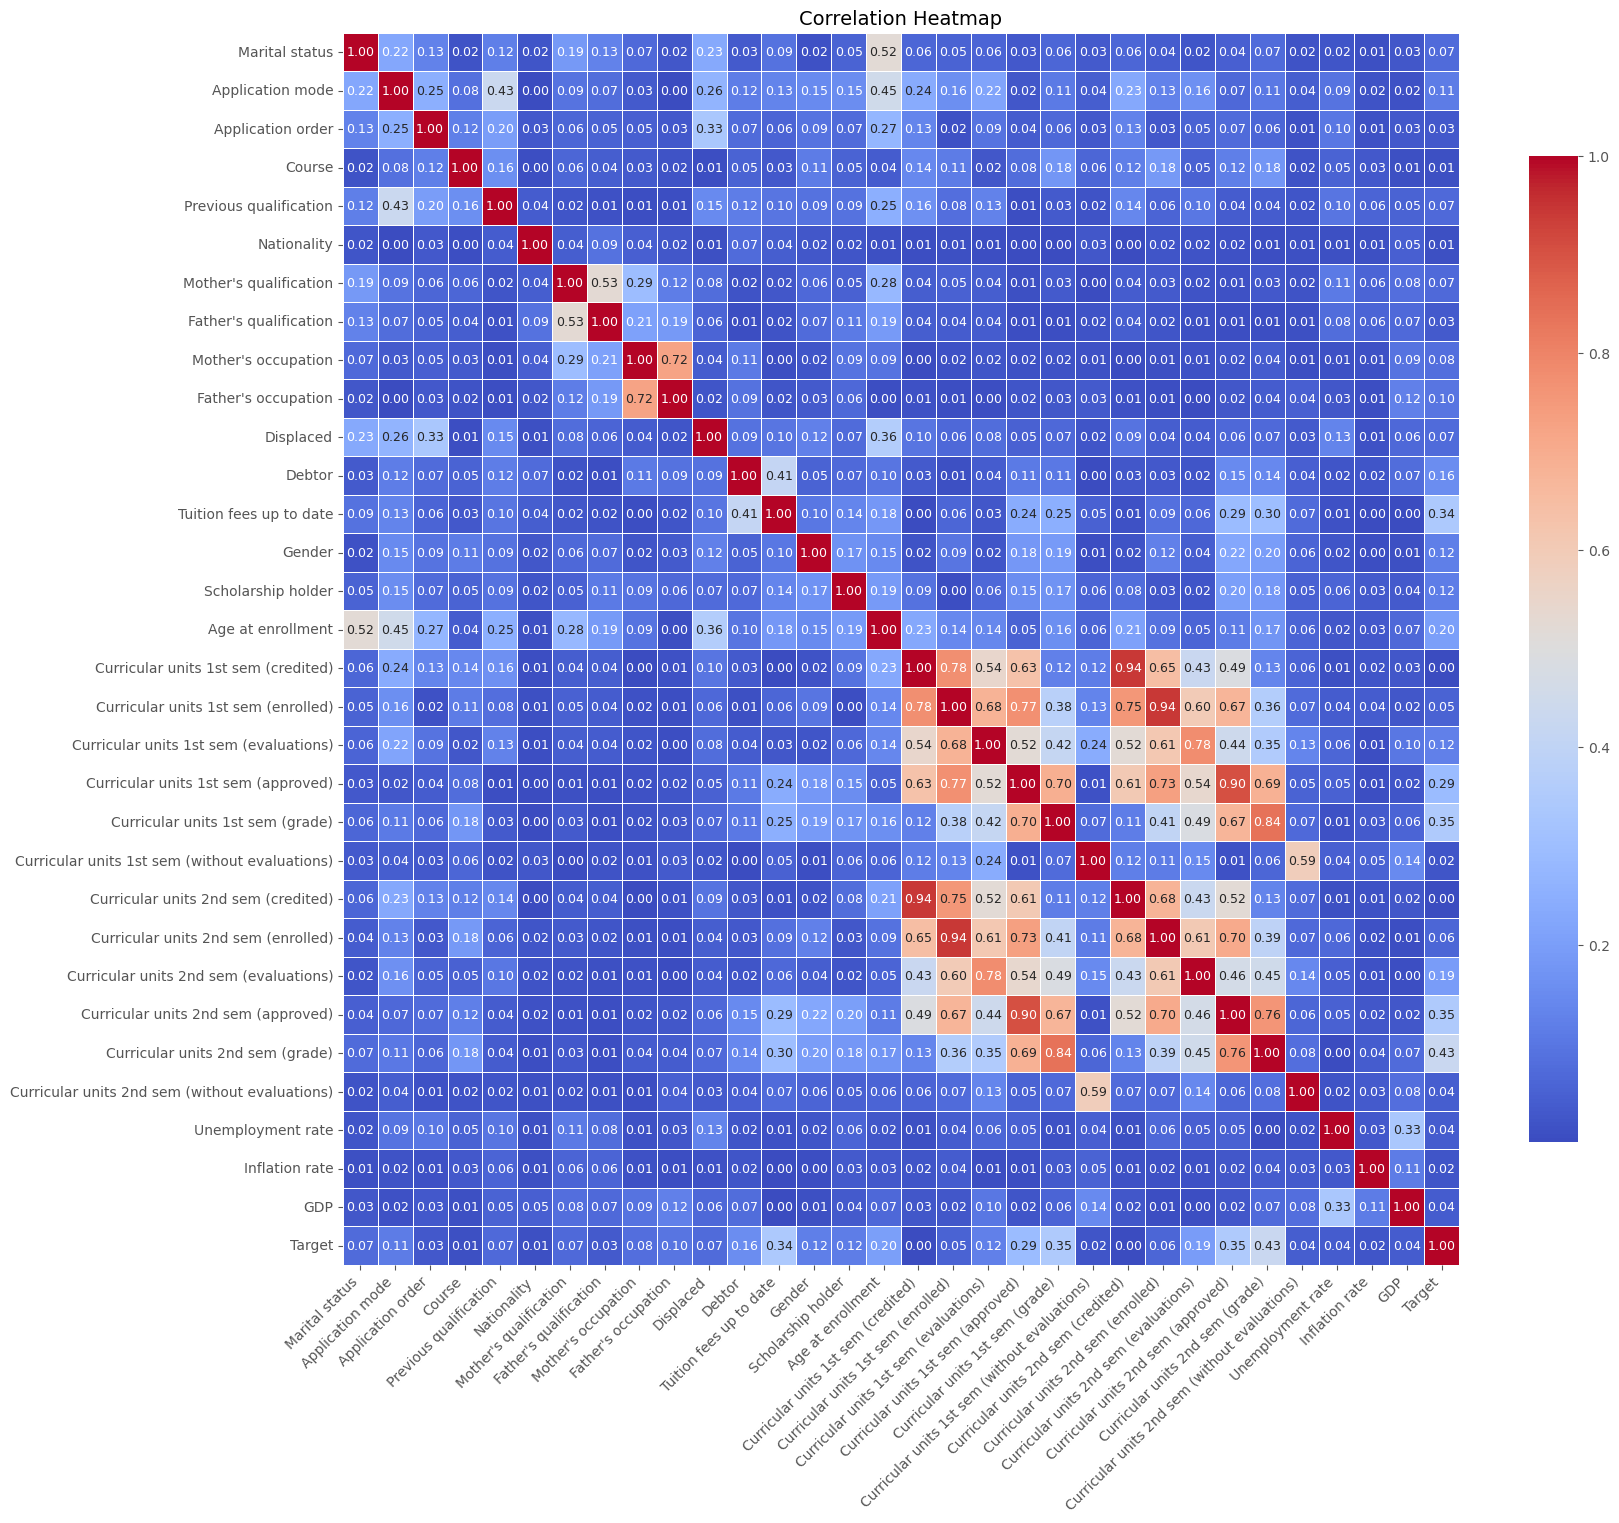

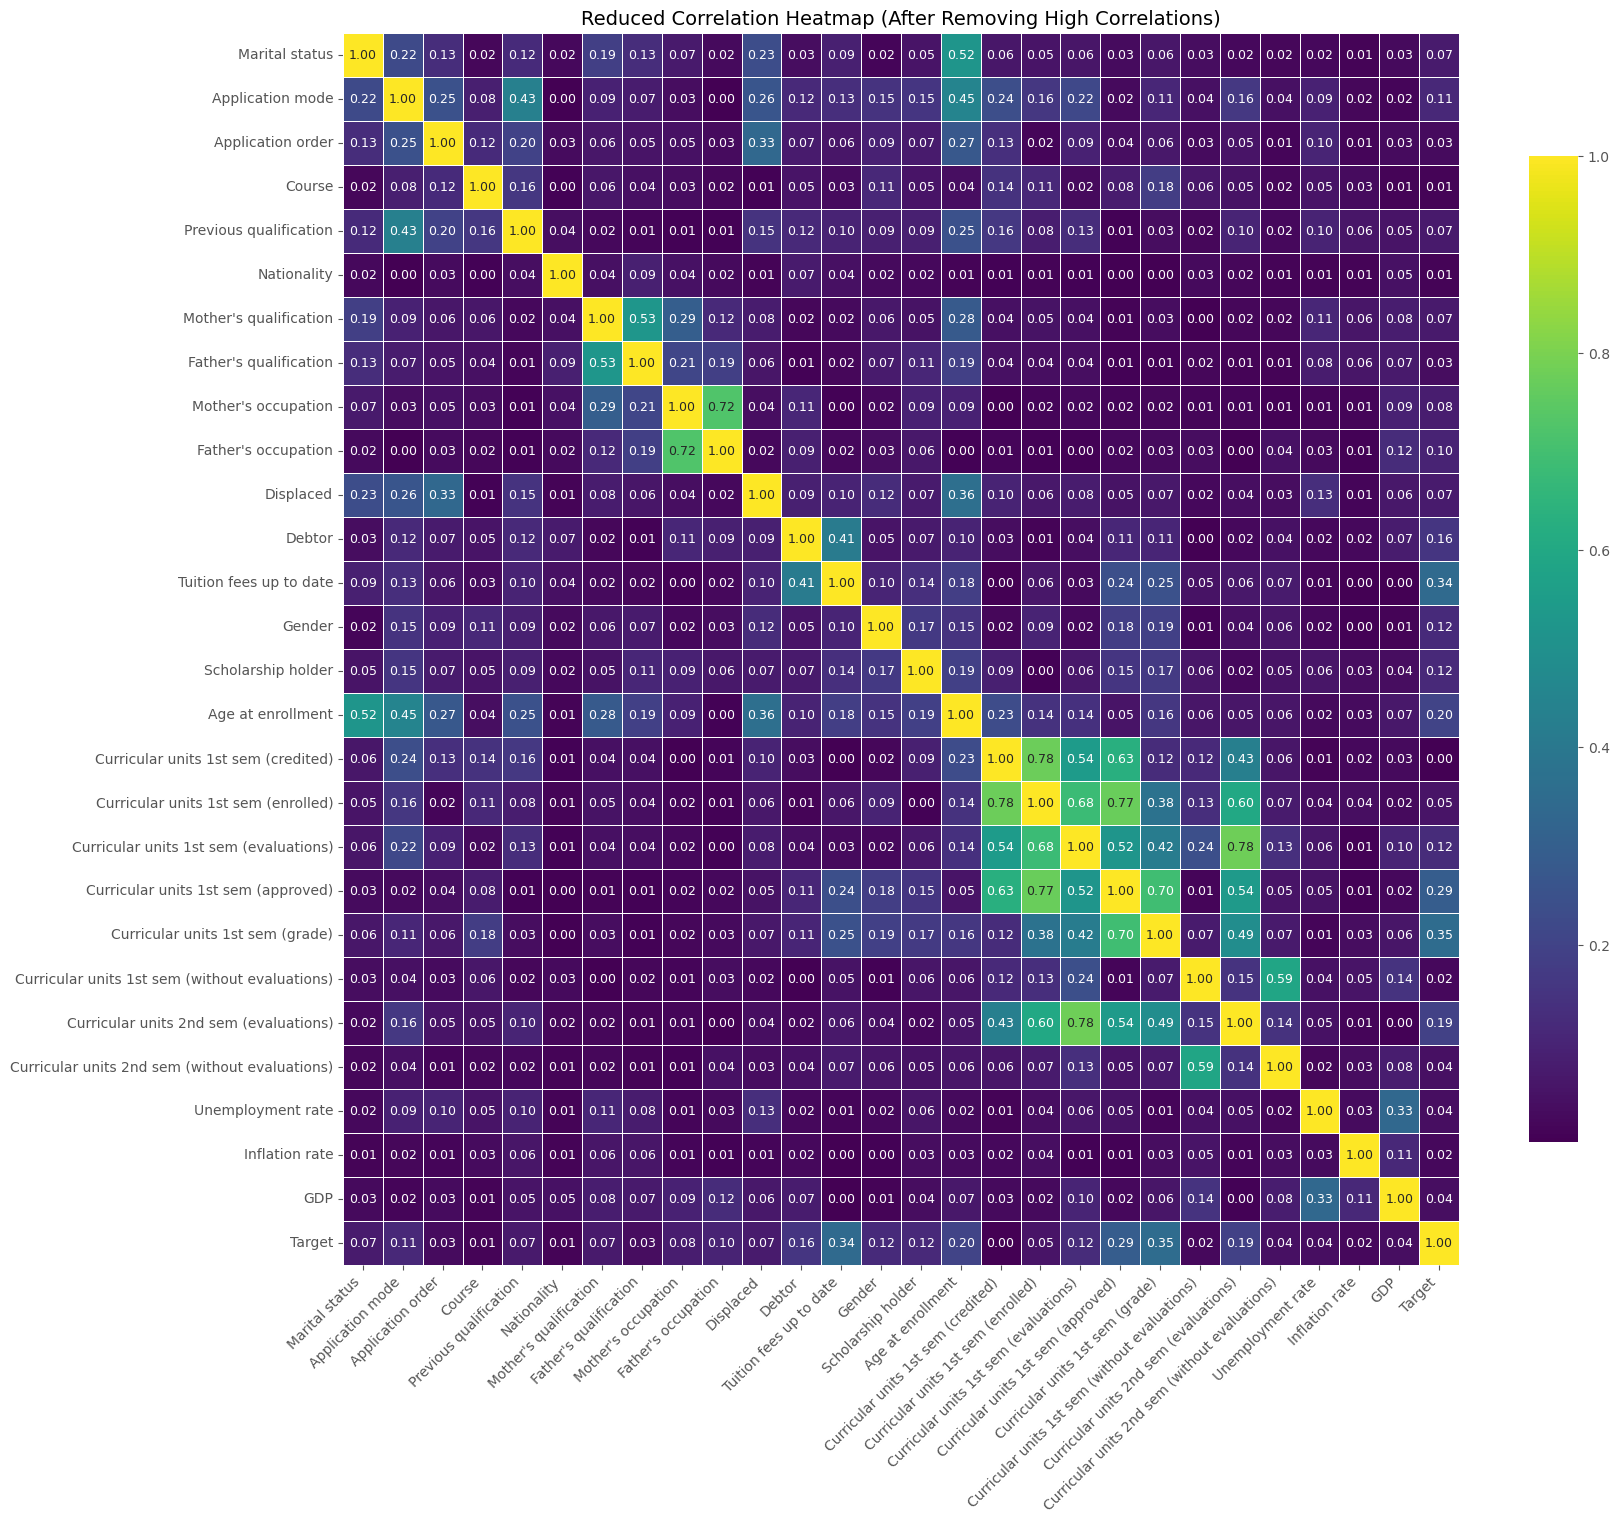

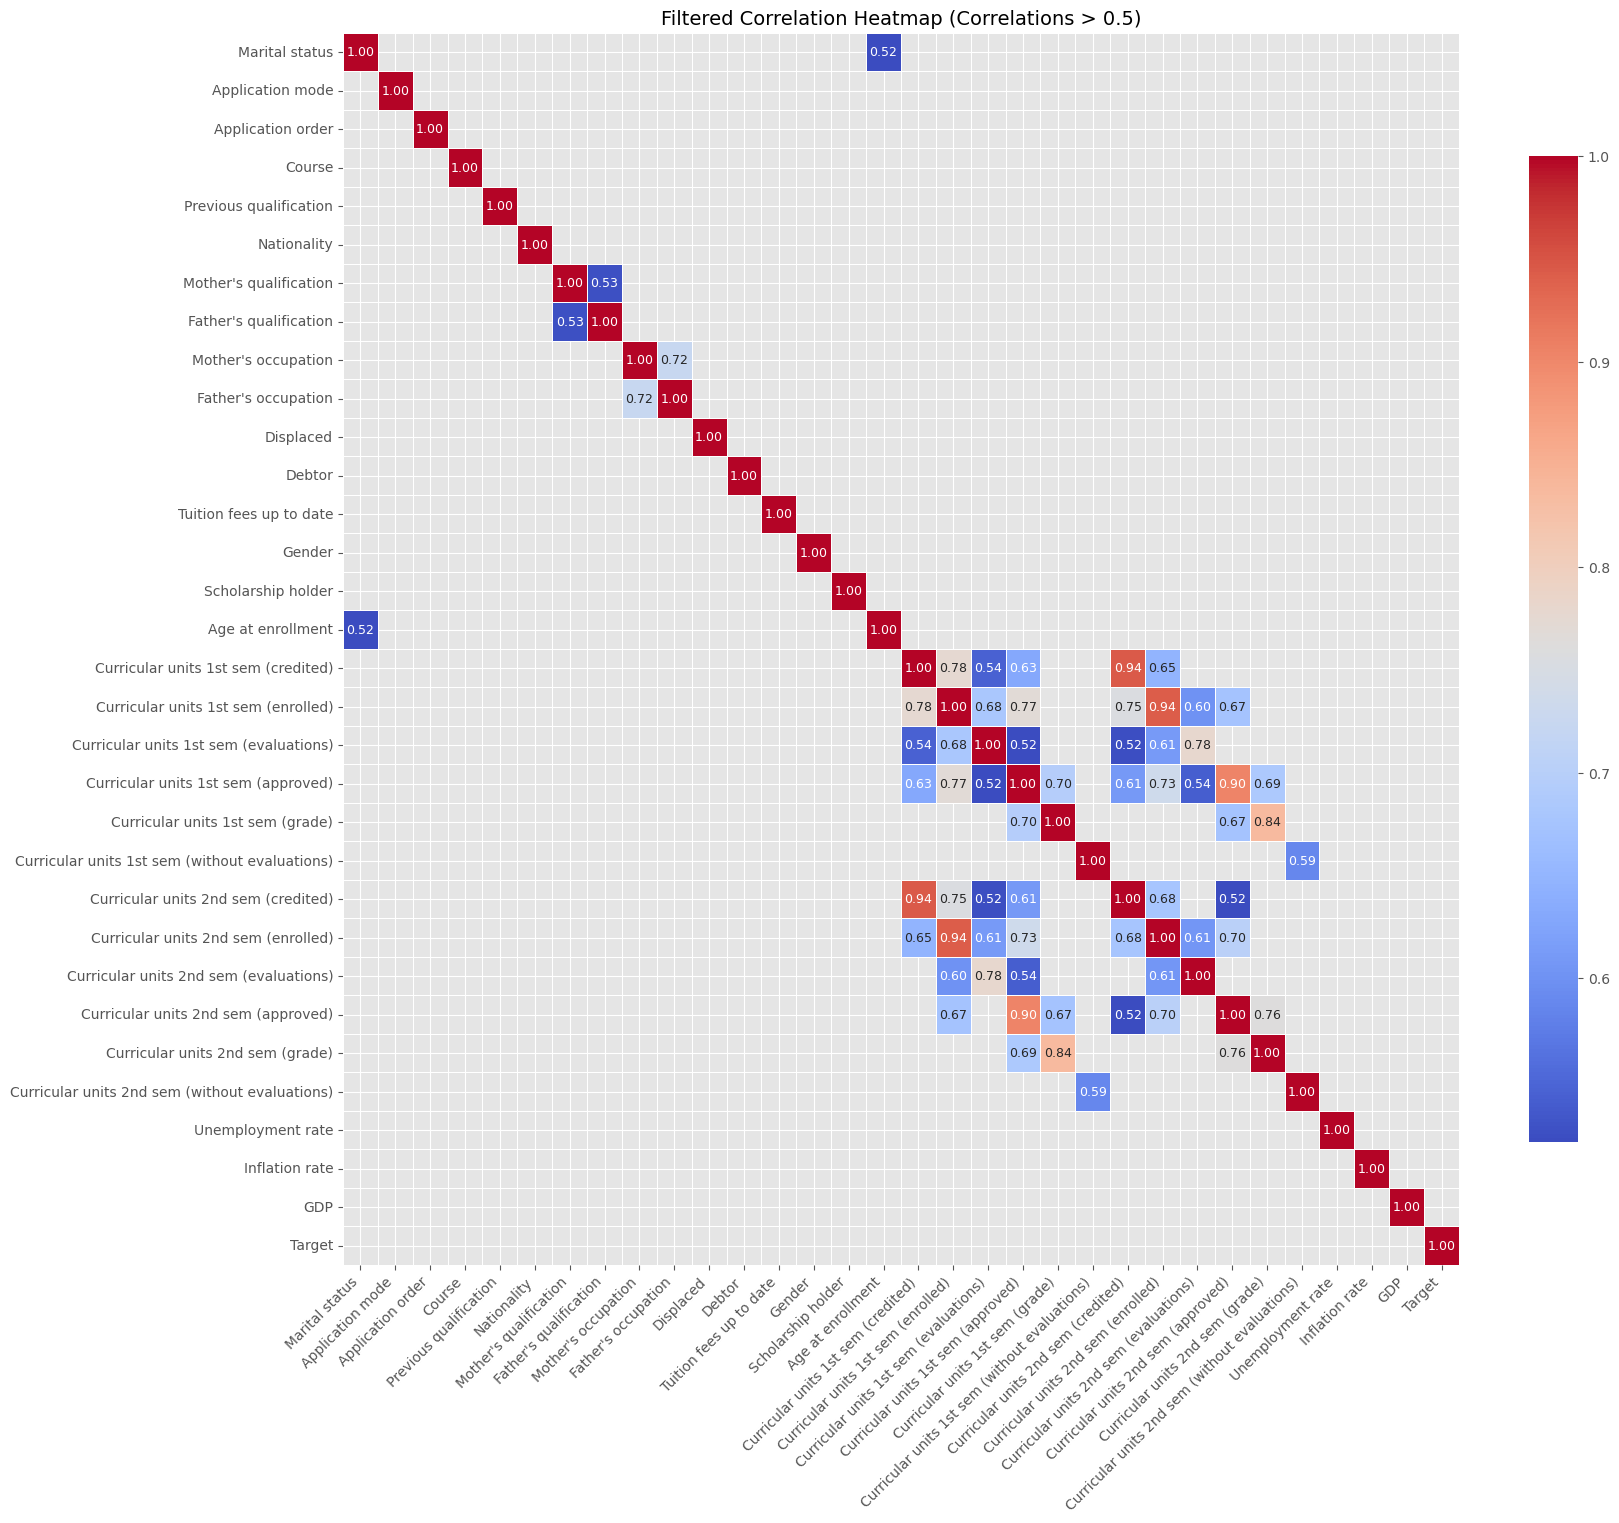

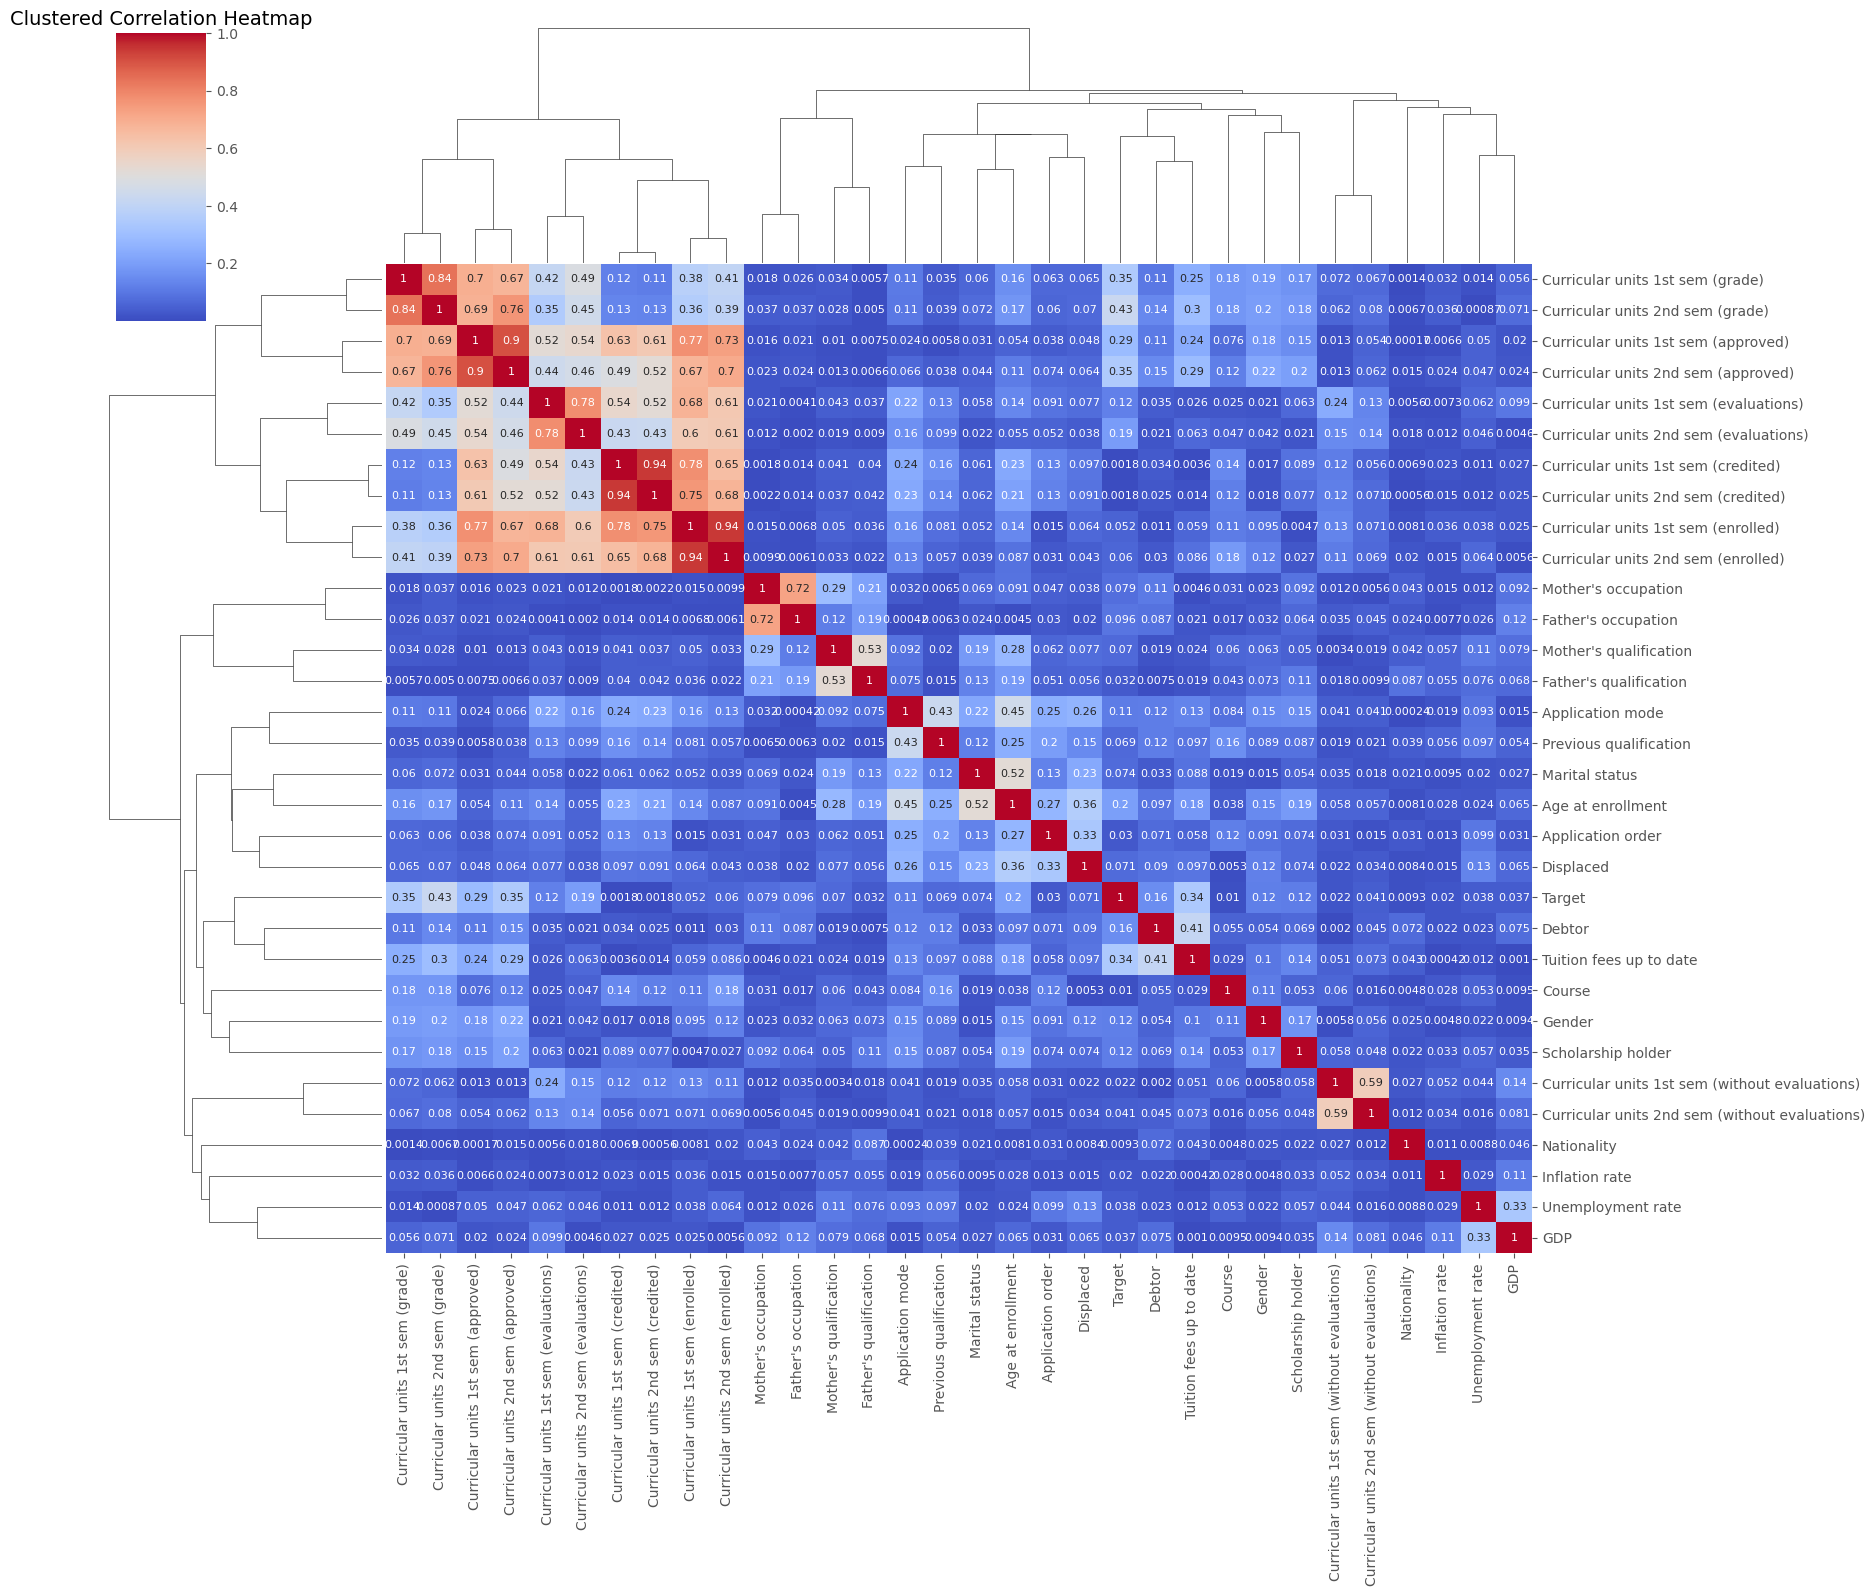

In [16]:
# Compute the correlation matrix
correlation_matrix = df.corr().abs()

# Remove highly correlated features
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_correlation_features = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.8)]
df_reduced = df.drop(columns=high_correlation_features)
reduced_corr_matrix = df_reduced.corr().abs()

print("Features removed due to high correlation:", high_correlation_features)

# Heatmap 1: Standard Heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    annot_kws={"size": 9},
    cbar_kws={"shrink": 0.8}
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# Heatmap 2: Reduced Correlation Matrix
plt.figure(figsize=(18, 16))
sns.heatmap(
    reduced_corr_matrix,
    annot=True,
    cmap='viridis',
    fmt='.2f',
    linewidths=0.5,
    annot_kws={"size": 9},
    cbar_kws={"shrink": 0.8}
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Reduced Correlation Heatmap (After Removing High Correlations)", fontsize=14)
plt.show()

# Heatmap 3: Focus on correlations > 0.5
filtered_corr_matrix = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
plt.figure(figsize=(18, 16))
sns.heatmap(
    filtered_corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    annot_kws={"size": 9},
    cbar_kws={"shrink": 0.8}
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Filtered Correlation Heatmap (Correlations > 0.5)", fontsize=14)
plt.show()

# Heatmap 4: Clustered Heatmap
sns.clustermap(
    correlation_matrix,
    cmap='coolwarm',
    annot=True,
    figsize=(18, 16),
    annot_kws={"size": 8}
)
plt.title("Clustered Correlation Heatmap", fontsize=14)
plt.show()

# Interactive Heatmap using Plotly
fig = px.imshow(
    correlation_matrix,
    text_auto=True,
    color_continuous_scale='Viridis'
)


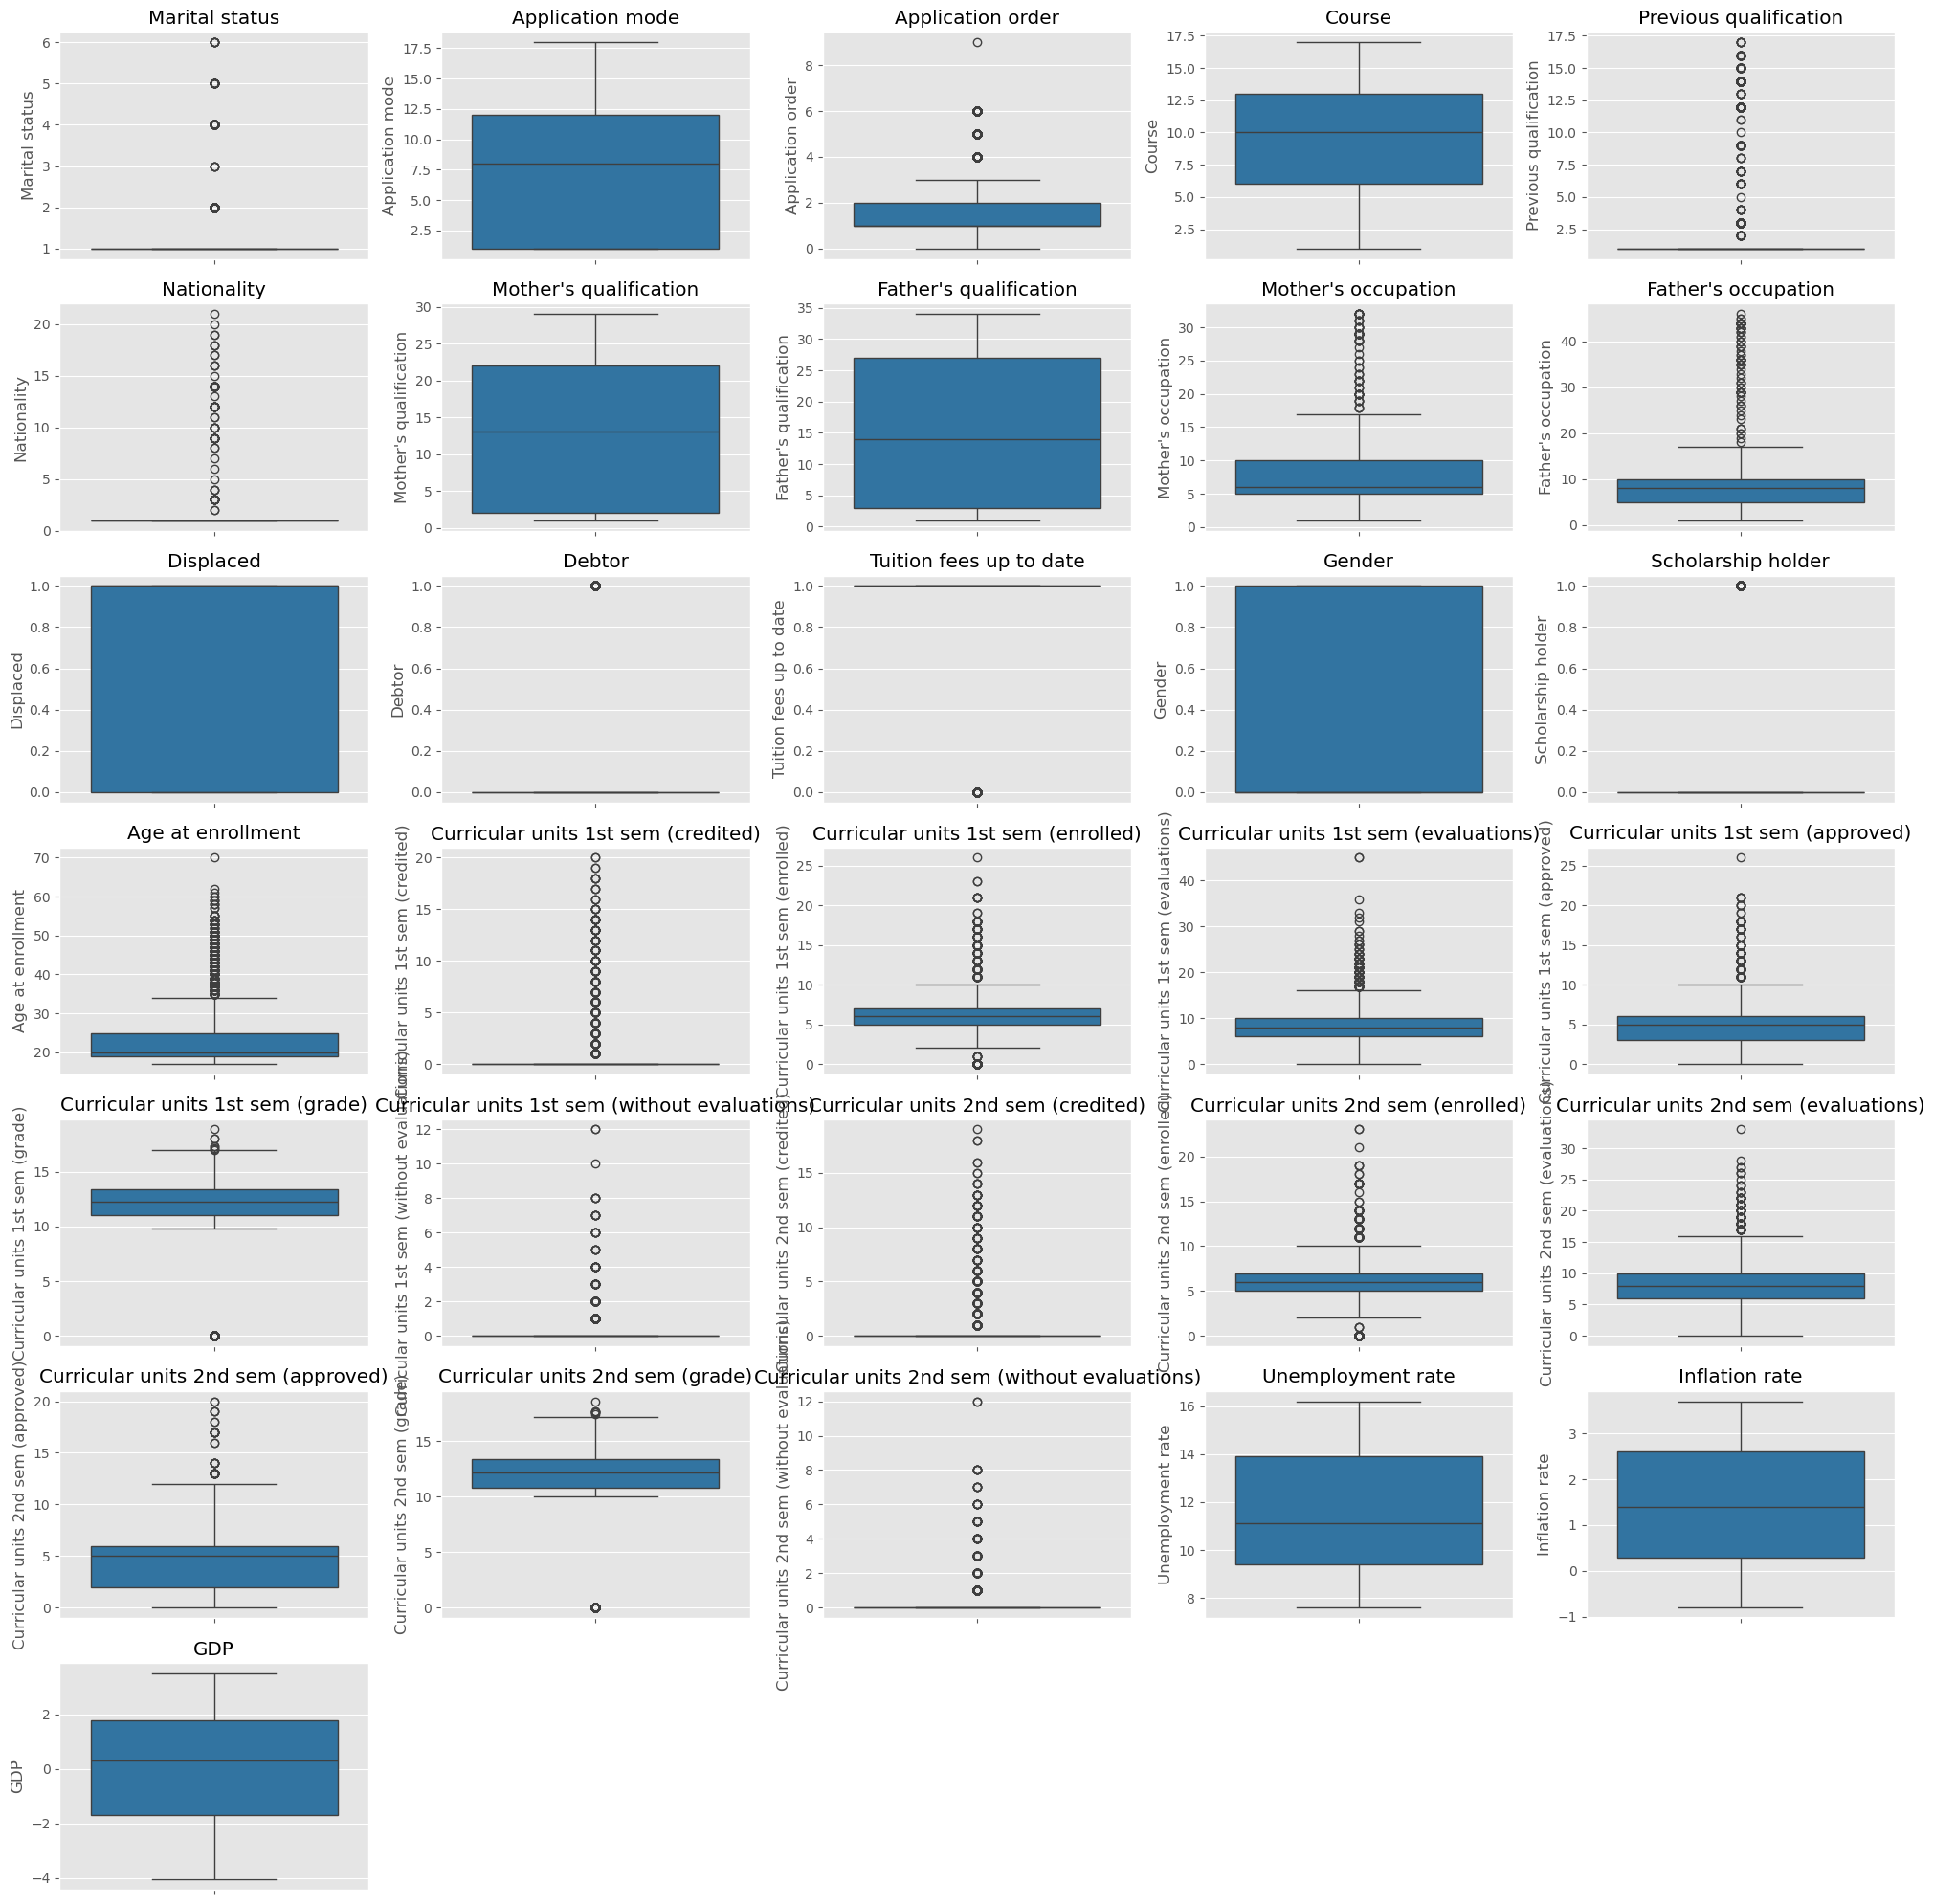

In [19]:
num_columns = len(df.columns) - 1  
num_rows = (num_columns // 5) + 1  

plt.figure(figsize=(20, 20))
for i, column in enumerate(df.columns.drop('Target'), 1):  # Exclude 'Target' for box plots
    plt.subplot(num_rows, 5, i)
    sns.boxplot(data=df, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

In [20]:
# Define a function to identify outliers based on IQR
def identify_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Get outliers for each column
outliers = identify_outliers_iqr(df)
# Display columns with outliers and their corresponding outlier values
for col, vals in outliers.items():
    if not vals.empty:
        print(f"{col} has outliers:")
        print(vals)
    else:
        print(f"{col} has no outliers.")


Marital status has outliers:
3       4
21      2
30      4
44      2
49      2
       ..
4365    2
4369    2
4373    2
4374    2
4380    4
Name: Marital status, Length: 503, dtype: int64
Application mode has no outliers.
Application order has outliers:
5       5
7       6
12      6
38      4
41      4
       ..
4341    6
4359    4
4362    4
4370    4
4384    6
Name: Application order, Length: 535, dtype: int64
Course has no outliers.
Previous qualification has outliers:
1        8
4       14
13      14
21       3
22      15
        ..
4366     3
4369    12
4376    14
4380    12
4383    14
Name: Previous qualification, Length: 704, dtype: int64
Nationality has outliers:
4        3
56      14
57      14
60      12
487     12
        ..
4283    14
4285    12
4287     7
4385    19
4388     9
Name: Nationality, Length: 109, dtype: int64
Mother's qualification has no outliers.
Father's qualification has no outliers.
Mother's occupation has outliers:
102     20
164     28
258     29
333     2

In [21]:
#create a dataframe with all training data except the target column
train_X = df.drop(columns=['Target'])

#check that the target variable has been removed
train_X.head()

Marital status  Application mode  Application order  Course  \
0               1                12                  1       1   
1               1                12                  1       7   
2               1                14                  1       9   
3               4                12                  1      17   
4               1                15                  1       8   

   Previous qualification  Nationality  Mother's qualification  \
0                       1            1                      23   
1                       8            1                      19   
2                       1            1                      22   
3                       1            1                      13   
4                      14            3                       4   

   Father's qualification  Mother's occupation  Father's occupation  \
0                      27                   10                    7   
1                      27                    1                    1   
2                      27                    7                    7   
3                      14                   10                    4   
4                       4                    4                    7   

   Displaced  Debtor  Tuition fees up to date  Gender  Scholarship holder  \
0          0       1                        0       1                   0   
1          1       0                        1       1                   0   
2          0       0                        1       0                   0   
3          1       0                        1       0                   0   
4          0       1                        0       0                   0   

   Age at enrollment  Curricular units 1st sem (credited)  \
0                 37                                    0   
1                 43                                    0   
2                 55                                    0   
3                 39                                    0   
4                 20                                    2   

   Curricular units 1st sem (enrolled)  \
0                                    7   
1                                    5   
2                                    5   
3                                    5   
4                                    6   

   Curricular units 1st sem (evaluations)  \
0                                       7   
1                                       0   
2                                      10   
3                                       8   
4                                      13   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    0                          0.000000   
2                                    1                         10.000000   
3                                    5                         11.000000   
4                                    3                         11.666667   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    7   
1                                    0                                    5   
2                                    0                                    5   
3                                    0                                    5   
4                                    1                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       7   
1                                       0   
2                                       8 

FOR ALL BOOSTING ALGORITHM

In [22]:
# Separate features and target
X = df.drop('Target', axis=1)  # Select all columns except 'Target' for features
y = df['Target']               # Select the 'Target' column for the target variable

# Single train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

####XGBOOST####

In [23]:
# XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

XGBoost Classifier Report:
              precision    recall  f1-score   support

           0       0.50      0.43      0.46       236
           1       0.82      0.88      0.85       656
           2       0.79      0.77      0.78       425

    accuracy                           0.76      1317
   macro avg       0.71      0.69      0.70      1317
weighted avg       0.75      0.76      0.76      1317

XGBoost Accuracy: 0.762338648443432


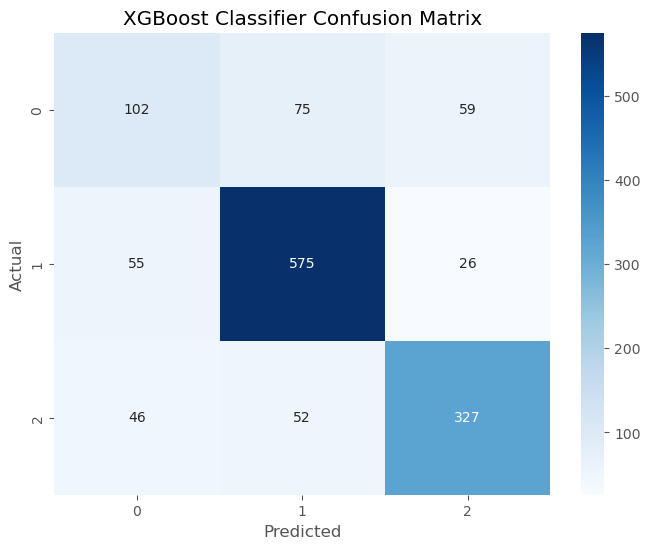

In [24]:
# Predict and evaluate XGBoost
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classifier Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Confusion Matrix for XGBoost
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("XGBoost Classifier Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

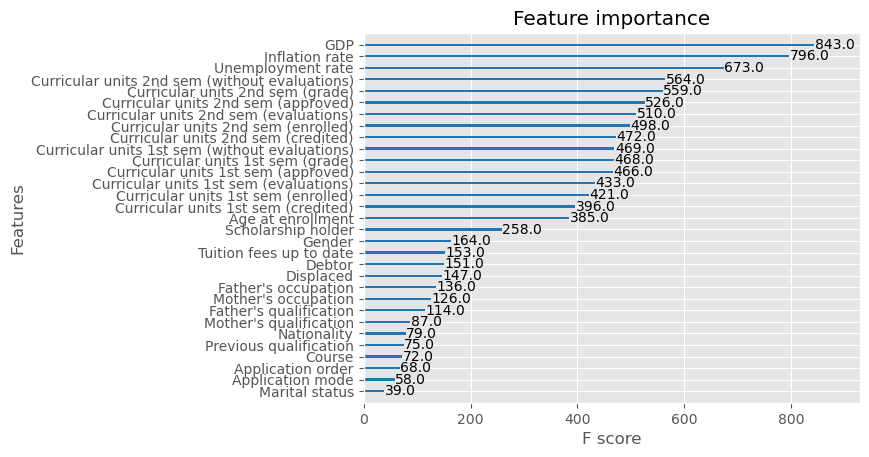

In [25]:
xgb.plot_importance(xgb_model, importance_type="weight", xlabel="F score")
ax = plt.gca()
ax.set_yticklabels(X.columns[ax.get_yticks().astype(int)])

plt.show()

####ADABOOST####

In [27]:
# Initialize the AdaBoost model
ada_model = AdaBoostClassifier(algorithm='SAMME')
ada_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME')

In [28]:
# Predict and evaluate AdaBoost
y_pred_ada = ada_model.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average='macro')
recall_ada = recall_score(y_test, y_pred_ada, average='macro')
f1_ada = f1_score(y_test, y_pred_ada, average='macro')

# Evaluation metrics for ADABoost
print("\n--- ADABoost ---")
print(f'Accuracy: {accuracy_ada:.4f}')
print(f'Precision: {precision_ada:.4f}')
print(f'Recall: {recall_ada:.4f}')
print(f'F1 Score: {f1_ada:.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada))


--- ADABoost ---
Accuracy: 0.7297
Precision: 0.6822
Recall: 0.6859
F1 Score: 0.6819

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.52      0.46       236
           1       0.83      0.80      0.81       656
           2       0.80      0.74      0.77       425

    accuracy                           0.73      1317
   macro avg       0.68      0.69      0.68      1317
weighted avg       0.75      0.73      0.74      1317



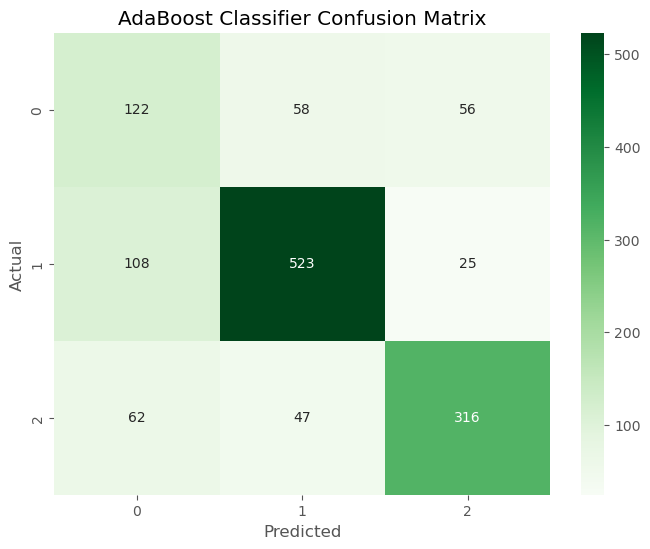

In [29]:
# Confusion Matrix for AdaBoost
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("AdaBoost Classifier Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

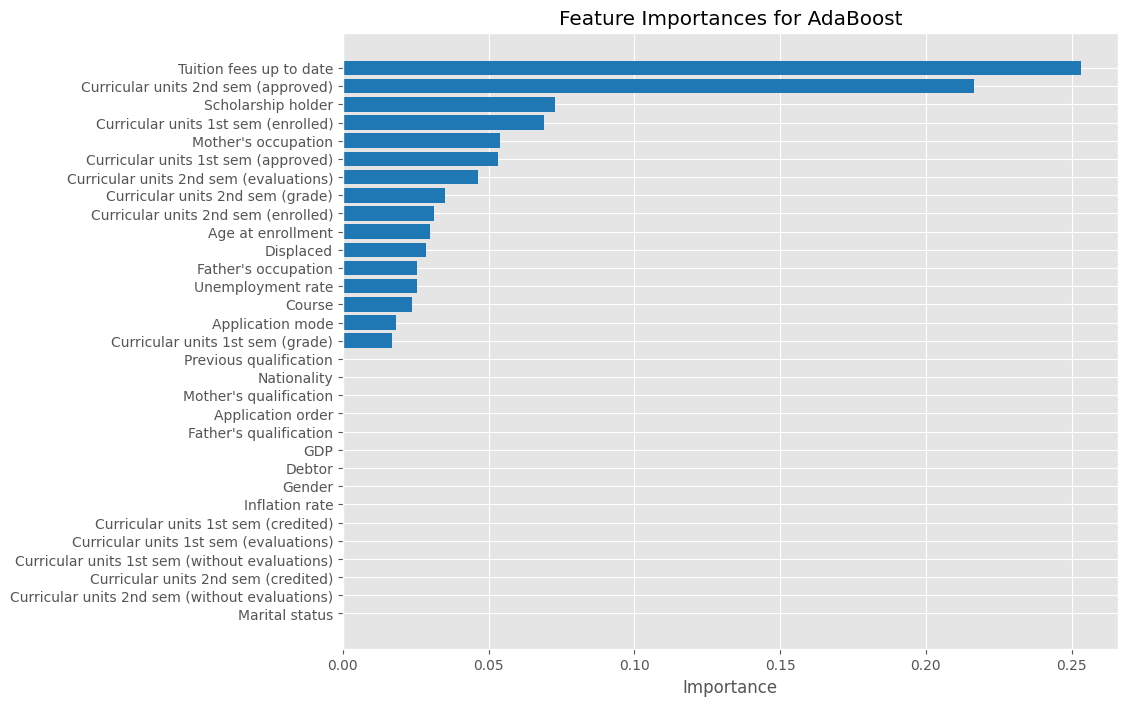

In [27]:
# Feature Importance Visualization for AdaBoost
importances = ada_model.feature_importances_
feature_names = X.columns  # Assuming X is a DataFrame with named columns

# Sort features by importance
sorted_idx = np.argsort(importances)
plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances for AdaBoost')
plt.show()

####CATBOOST####

In [30]:
# Initialize the CatBoost model
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    random_state=42,
    verbose=0  # Suppress detailed training output
)

In [31]:
# Train the CatBoost model
cat_model.fit(X_train, y_train)

In [32]:
# Predict and evaluate CatBoost
y_pred_cat = cat_model.predict(X_test)

print("CatBoost Classifier Report:")
print(classification_report(y_test, y_pred_cat))
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))


CatBoost Classifier Report:
              precision    recall  f1-score   support

           0       0.52      0.49      0.51       236
           1       0.83      0.88      0.86       656
           2       0.82      0.76      0.79       425

    accuracy                           0.77      1317
   macro avg       0.72      0.71      0.72      1317
weighted avg       0.77      0.77      0.77      1317

CatBoost Accuracy: 0.7744874715261959


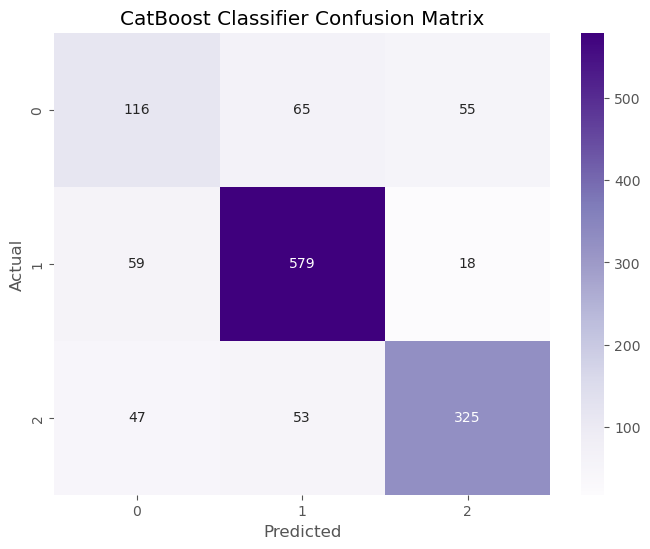

In [33]:
# Confusion Matrix for CatBoost
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_cat),
            annot=True, fmt='d', cmap='Purples',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("CatBoost Classifier Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


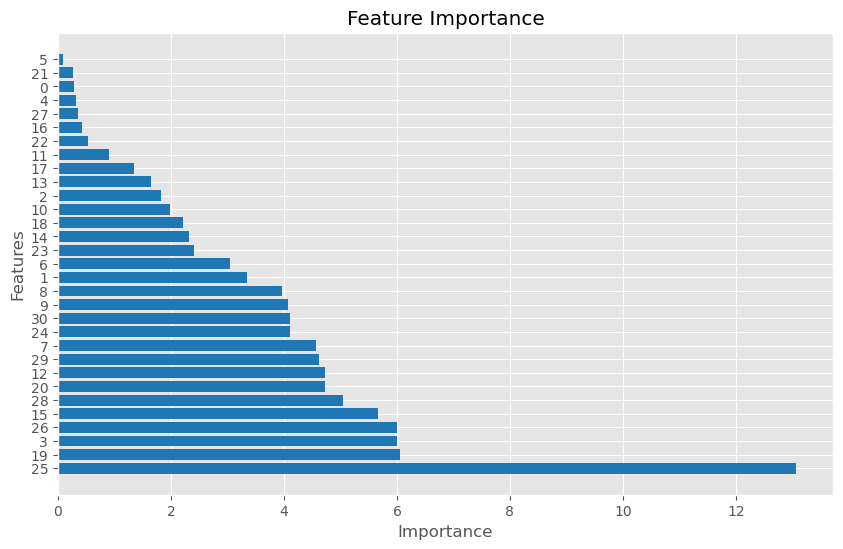

In [34]:
# Feature Importance Visualization
feature_importance = cat_model.get_feature_importance(prettified=True)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature Id'], feature_importance['Importances'])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

#### COMPARISON ####

In [35]:
# Store results in a dictionary
results = {
    'Model': ['XGBoost', 'AdaBoost', 'CatBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_ada),
        accuracy_score(y_test, y_pred_cat)
    ],
    'Classification Report': [
        classification_report(y_test, y_pred_xgb, output_dict=True),
        classification_report(y_test, y_pred_ada, output_dict=True),
        classification_report(y_test, y_pred_cat, output_dict=True)
    ]
}

print(results)

{'Model': ['XGBoost', 'AdaBoost', 'CatBoost'], 'Accuracy': [0.762338648443432, 0.7296886864085042, 0.7744874715261959], 'Classification Report': [{'0': {'precision': 0.5024630541871922, 'recall': 0.4322033898305085, 'f1-score': 0.4646924829157175, 'support': 236.0}, '1': {'precision': 0.8190883190883191, 'recall': 0.8765243902439024, 'f1-score': 0.8468335787923417, 'support': 656.0}, '2': {'precision': 0.7936893203883495, 'recall': 0.7694117647058824, 'f1-score': 0.7813620071684588, 'support': 425.0}, 'accuracy': 0.762338648443432, 'macro avg': {'precision': 0.7050802312212868, 'recall': 0.692713181593431, 'f1-score': 0.6976293562921727, 'support': 1317.0}, 'weighted avg': {'precision': 0.7541542743167526, 'recall': 0.762338648443432, 'f1-score': 0.7572278714521492, 'support': 1317.0}}, {'0': {'precision': 0.4178082191780822, 'recall': 0.5169491525423728, 'f1-score': 0.4621212121212121, 'support': 236.0}, '1': {'precision': 0.8328025477707006, 'recall': 0.7972560975609756, 'f1-score': 

      Model  Accuracy
0   XGBoost  0.762339
1  AdaBoost  0.729689
2  CatBoost  0.774487


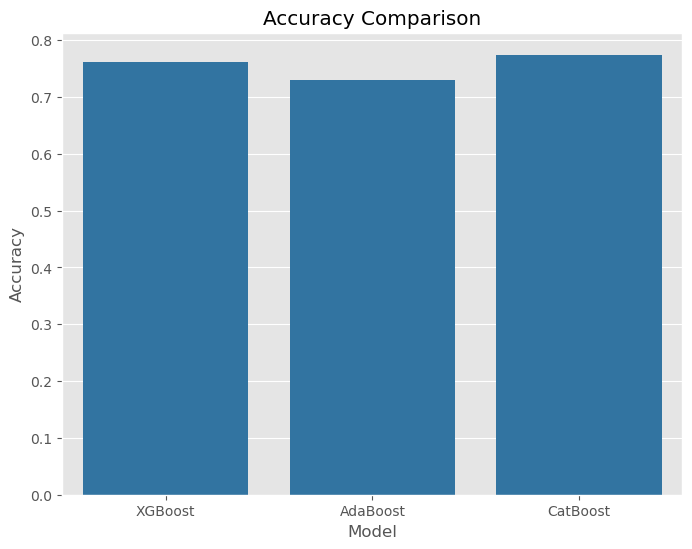

In [36]:
# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results)
print(results_df[['Model', 'Accuracy']])  # Display accuracy for each model

# Plot Accuracy Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Accuracy Comparison')
plt.show()

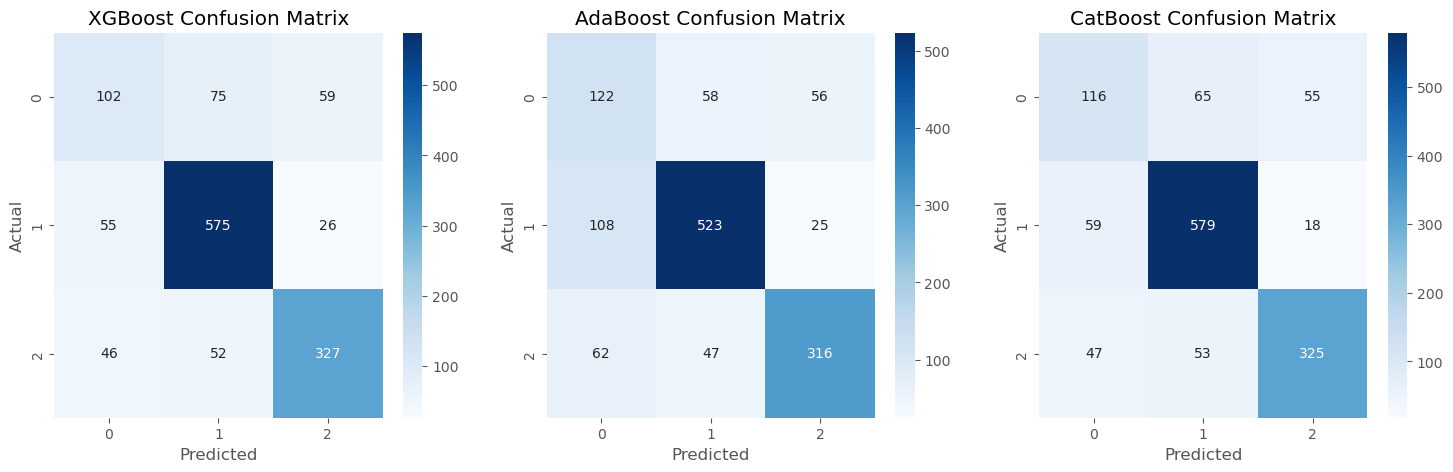

In [37]:
# Confusion Matrix Comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, (model, y_pred) in enumerate([('XGBoost', y_pred_xgb), ('AdaBoost', y_pred_ada), ('CatBoost', y_pred_cat)]):
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{model} Confusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.show()

In [38]:
# Debug: Check lengths
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred_xgb: {len(y_pred_xgb)}")
print(f"Length of y_pred_ada: {len(y_pred_ada)}")
print(f"Length of y_pred_cat: {len(y_pred_cat)}")

Length of y_test: 1317
Length of y_pred_xgb: 1317
Length of y_pred_ada: 1317
Length of y_pred_cat: 1317


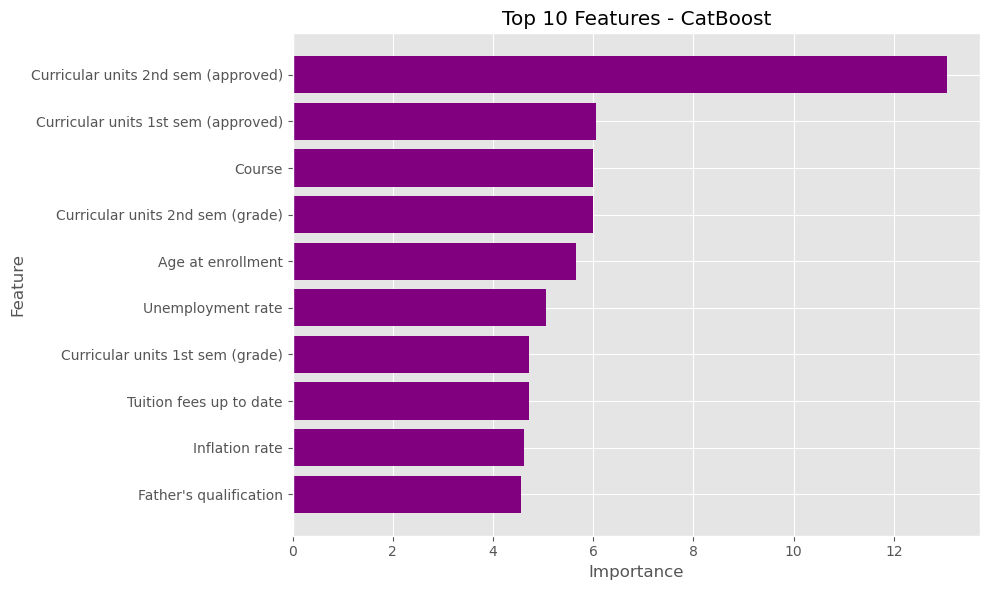

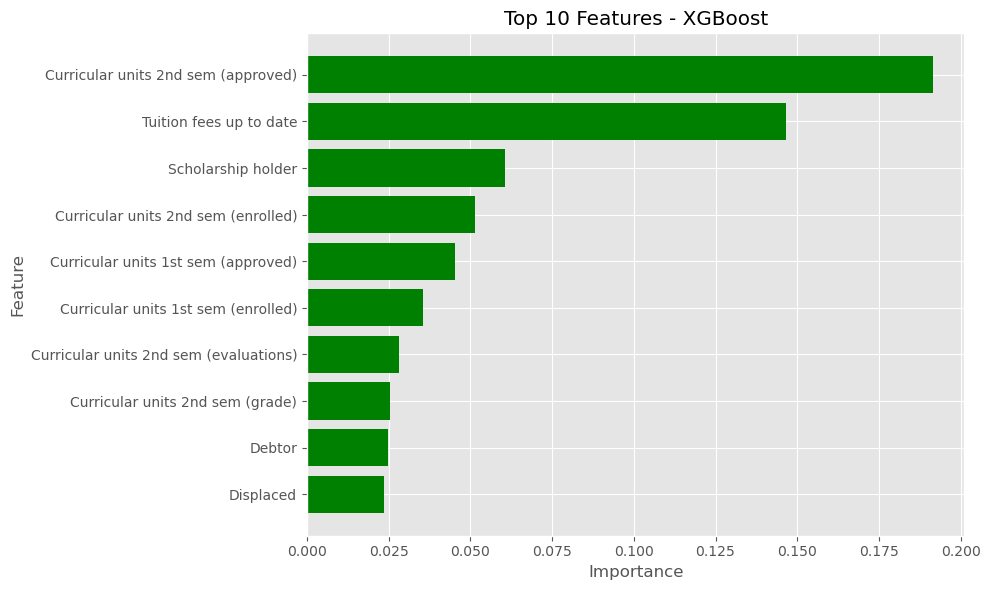

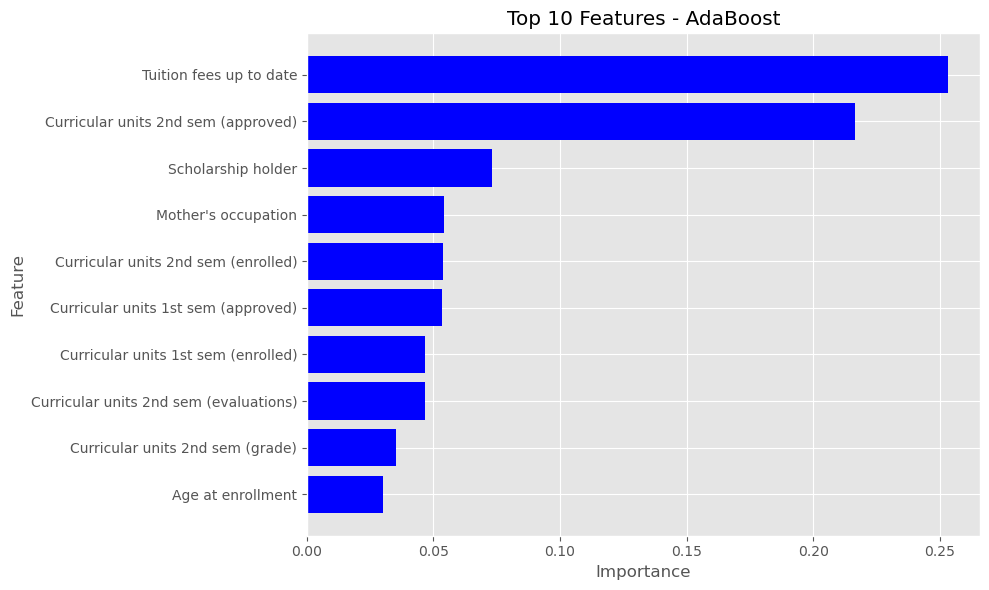

In [39]:
def plot_top_features(model, X, title, color, algorithm="catboost"):
    """
    Plots the top 10 features for the given model.
    :param model: Trained model
    :param X: Feature DataFrame
    :param title: Title for the plot
    :param color: Color for the bars
    :param algorithm: Type of model for specific handling ('catboost', 'xgboost', or 'adaboost')
    """
    if algorithm == "catboost":
        feature_importances = model.get_feature_importance(prettified=False)
    elif algorithm == "xgboost":
        feature_importances = model.feature_importances_
    elif algorithm == "adaboost":
        feature_importances = model.feature_importances_
    else:
        raise ValueError("Unsupported algorithm")

    # Get the top 10 features
    feature_indices = np.argsort(feature_importances)[-10:][::-1]  # Top 10 indices in descending order
    top_features = [(X.columns[i], feature_importances[i]) for i in feature_indices]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh([feature for feature, _ in reversed(top_features)],
             [importance for _, importance in reversed(top_features)],
             color=color)
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title(title)
    plt.tight_layout()
    plt.show()


# Plotting CatBoost top 10 features
plot_top_features(cat_model, X, "Top 10 Features - CatBoost", color="purple", algorithm="catboost")

# Plotting XGBoost top 10 features
plot_top_features(xgb_model, X, "Top 10 Features - XGBoost", color="green", algorithm="xgboost")

# Plotting AdaBoost top 10 features
plot_top_features(ada_model, X, "Top 10 Features - AdaBoost", color="blue", algorithm="adaboost")


XGBOOST HYPERPARAMETER TUNING

In [40]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(random_state=1)
from scipy.stats import randint, uniform

# XGBoost Parameter Distribution
param_dist_xgboost = {
    'n_estimators': randint(50, 500),        # Integer range
    'learning_rate': uniform(0.01, 0.49),    # Continuous range
    'max_depth': randint(3, 10)              # Integer range
}

# Create a RandomizedSearchCV object for XGBoost
random_search_xgboost = RandomizedSearchCV(
    estimator=xgboost,
    param_distributions=param_dist_xgboost,
    n_iter=10,                  # Number of random combinations to try
    cv=5,                       # 5-fold cross-validation
    scoring='accuracy',         # Optimize for accuracy
    random_state=42,
    n_jobs=-1                  # Use all available cores
)

# Perform random search for XGBoost
random_search_xgboost.fit(X_train, y_train)

# Best parameters and best score for XGBoost
print("Best parameters (XGBoost):", random_search_xgboost.best_params_)
print("Best cross-validation score (XGBoost): {:.2f}".format(random_search_xgboost.best_score_))

# Evaluate the best model found by the random search on the test set for XGBoost
best_model_xgboost = random_search_xgboost.best_estimator_
y_pred_best_xgb = best_model_xgboost.predict(X_test)
print("Test set accuracy (XGBoost): {:.2f}".format(accuracy_score(y_test, y_pred_best_xgb)))

Best parameters (XGBoost): {'learning_rate': 0.2671395835266107, 'max_depth': 9, 'n_estimators': 219}
Best cross-validation score (XGBoost): 0.85
Test set accuracy (XGBoost): 0.76


ADABOOST HYPERPARAMETER TUNING

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score

# Define an AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state=1, algorithm='SAMME')

# Define a parameter distribution for AdaBoost
param_dist_adaboost = {
    'n_estimators': randint(50, 500),       # Integer range
    'learning_rate': uniform(0.01, 0.49)   # Float range (0.01 to 0.5)
}

# Create a RandomizedSearchCV object for AdaBoost
random_search_adaboost = RandomizedSearchCV(
    estimator=adaboost,
    param_distributions=param_dist_adaboost,
    n_iter=10,                  # Number of random combinations to try
    cv=5,                       # 5-fold cross-validation
    scoring='accuracy',         # Optimize for accuracy
    random_state=42,
    n_jobs=-1                   # Use all available cores
)

# Perform random search for AdaBoost
random_search_adaboost.fit(X_train, y_train)

# Best parameters and best score for AdaBoost
print("Best parameters (AdaBoost):", random_search_adaboost.best_params_)
print("Best cross-validation score (AdaBoost): {:.2f}".format(random_search_adaboost.best_score_))

# Evaluate the best model found by the random search on the test set for AdaBoost
best_model_adaboost = random_search_adaboost.best_estimator_
y_pred_best_ada = best_model_adaboost.predict(X_test)
print("Test set accuracy (AdaBoost): {:.2f}".format(accuracy_score(y_test, y_pred_best_ada)))


Best parameters (AdaBoost): {'learning_rate': 0.35695556312006227, 'n_estimators': 199}
Best cross-validation score (AdaBoost): 0.73
Test set accuracy (AdaBoost): 0.74


CATBOOST HYPERPARAMETER TUNING

In [43]:
from catboost import CatBoostClassifier
# Define a CatBoostClassifier
catboost = CatBoostClassifier(verbose=0, random_seed=1)

# Define a parameter distribution
param_dist = {
    'iterations': (100, 500),                  # Number of boosting iterations
    'learning_rate': (0.01, 0.5),              # Learning rate
    'depth': (4, 10),                          # Tree depth
    'l2_leaf_reg': (1e-4, 1e-1)                # L2 regularization
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=catboost,
    param_distributions=param_dist,
    n_iter=10,                  # Number of random combinations to try
    cv=5,                       # 5-fold cross-validation
    scoring='accuracy',         # Optimize for accuracy
    random_state=42,
    n_jobs=-1                   # Use all available cores
)

# Perform random search
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

# Evaluate the best model found by the random search on the test set
best_model = random_search.best_estimator_
y_pred_best_cat = best_model.predict(X_test)
print("Test set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_best_cat)))

Best parameters: {'learning_rate': 0.5, 'l2_leaf_reg': 0.0001, 'iterations': 500, 'depth': 10}
Best cross-validation score: 0.86
Test set accuracy: 0.76


              Model  Accuracy
0   XGBoost (Tuned)  0.760061
1  AdaBoost (Tuned)  0.737282
2  CatBoost (Tuned)  0.763098


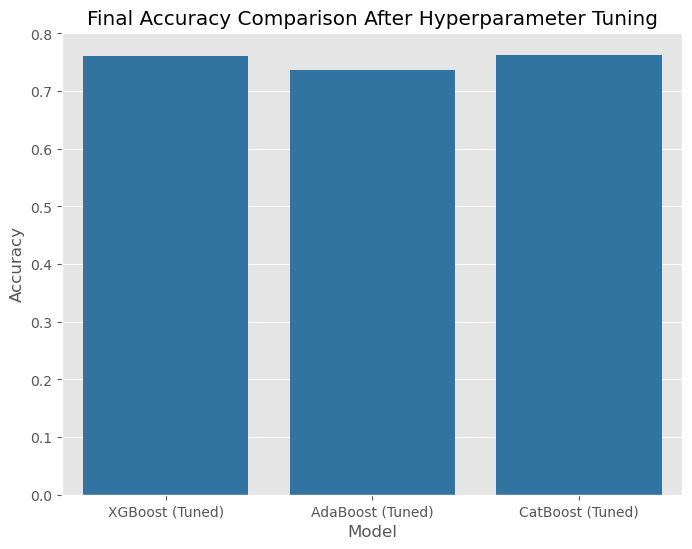

In [44]:
# Final Results After Hyperparameter Tuning
final_results = {
    'Model': ['XGBoost (Tuned)', 'AdaBoost (Tuned)', 'CatBoost (Tuned)'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_best_xgb),
        accuracy_score(y_test, y_pred_best_ada),
        accuracy_score(y_test, y_pred_best_cat)
    ]
}

# Convert to DataFrame
final_results_df = pd.DataFrame(final_results)
print(final_results_df)

# Plot Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=final_results_df)
plt.title('Final Accuracy Comparison After Hyperparameter Tuning')
plt.show()


Wilcoxon signed-rank test

In [45]:
from scipy.stats import wilcoxon

# Collect cross-validation accuracies from RandomizedSearchCV results
xgboost_accuracies = random_search_xgboost.cv_results_['mean_test_score']
adaboost_accuracies = random_search_adaboost.cv_results_['mean_test_score']
catboost_accuracies = random_search.cv_results_['mean_test_score']

# Function to perform Wilcoxon Signed-Rank Test
def wilcoxon_test(accuracies1, accuracies2, label1='Model 1', label2='Model 2'):
    stat, p = wilcoxon(accuracies1, accuracies2)
    print(f"\nWilcoxon Signed-Rank Test ({label1} vs {label2}):")
    print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")

    if p < 0.05:
        print(f"Result: The performances between {label1} and {label2} are significantly different (p < 0.05).")
    else:
        print(f"Result: The performances between {label1} and {label2} are not significantly different (p >= 0.05).")

# Perform Wilcoxon tests for pairwise model comparisons
print("\nPairwise Comparisons:")
wilcoxon_test(xgboost_accuracies, adaboost_accuracies, label1='XGBoost', label2='AdaBoost')
wilcoxon_test(xgboost_accuracies, catboost_accuracies, label1='XGBoost', label2='CatBoost')
wilcoxon_test(adaboost_accuracies, catboost_accuracies, label1='AdaBoost', label2='CatBoost')


Pairwise Comparisons:

Wilcoxon Signed-Rank Test (XGBoost vs AdaBoost):
Statistic: 1.0000, p-value: 0.0039
Result: The performances between XGBoost and AdaBoost are significantly different (p < 0.05).

Wilcoxon Signed-Rank Test (XGBoost vs CatBoost):
Statistic: 24.0000, p-value: 0.7695
Result: The performances between XGBoost and CatBoost are not significantly different (p >= 0.05).

Wilcoxon Signed-Rank Test (AdaBoost vs CatBoost):
Statistic: 3.0000, p-value: 0.0098
Result: The performances between AdaBoost and CatBoost are significantly different (p < 0.05).


In [46]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb_model, X, y, cv=skf, scoring='accuracy')
print("XGBoost Cross-Validated Accuracy:", scores.mean())

XGBoost Cross-Validated Accuracy: 0.7680579112370554


In [48]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('xgb', xgb_model),
    ('ada', ada_model),
    ('cat', cat_model)
], voting='soft')

ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

print("Ensemble Accuracy:", accuracy_score(y_test, y_pred_ensemble))

Ensemble Accuracy: 0.7638572513287776


In [49]:
print("Train Accuracy (XGBoost):", accuracy_score(y_train, xgb_model.predict(X_train)))
print("Test Accuracy (XGBoost):", accuracy_score(y_test, y_pred_xgb))

print("Train Accuracy (ADABoost):", accuracy_score(y_train, ada_model.predict(X_train)))
print("Test Accuracy (ADABoost):", accuracy_score(y_test, y_pred_ada))

print("Train Accuracy (CATBoost):", accuracy_score(y_train, cat_model.predict(X_train)))
print("Test Accuracy (CATBoost):", accuracy_score(y_test, y_pred_cat))


Train Accuracy (XGBoost): 0.9993472584856397
Test Accuracy (XGBoost): 0.762338648443432
Train Accuracy (ADABoost): 0.7232375979112271
Test Accuracy (ADABoost): 0.7296886864085042
Train Accuracy (CATBoost): 0.9595300261096605
Test Accuracy (CATBoost): 0.7744874715261959
